## Scikit-Learn - Основная информация для DS

scikit-learn - библиотека, которая предлагает широкий функционал для работы с классическим машинным обучением. Например, алгоритмы классификации, регрессии, кластеризации, понижения размерности, работы с текстом.
В scikit-learn есть методы работы с такими моделями, как:
- Линейные;  
- Метрические;  
- Деревья;  
- Ансамбли;  

#### Основные этапы проекта машинного обучения: 
1) Постановка проблемы; 
2) Перевод проблемы на язык МО;
3) Метрики; 
4) Поиск данных;
5) EDA; 
6) Выбор стратегии разделения данных / Оптимизация гиперпараметров; 
7) Настройка пайплайна модели (моделей);
8) Обучение модели; Оценка качества; 
9) Выбор итоговой модели; 
10) Вывод в prod;
11) Поддержка / Улучшение модели;

##### ВАЖНАЯ ПАМЯТКА: заведомо неподходящие модели для решения задачи можно отсеять уже на этапе просмотра датасета (например, если слишком много категориальных данных, то линейная регрессия - вариант не очень);

Данная библиотека хороша совместима с такими библиотеками, как numpy, pandas, scipy, matplotlib.     
В scikit-learn имеется широкий набор встроенных утилит для работы с пайплайном проекта машинного обучения, например:
1) Работа с метриками;   
2) Препроцессинг;  
3) Создание и обучение модели;    
4) Создание пайплайна;  
5) Кросс-валидация;    
6) Автоматический подбор гиперпараметров и т.д.;  

Методы estimator-ов в scikit-learn:
- fit; 
- transform;  
- fit_transform (получается из TransformerMixin);   
- inverse_transform;
- predict;  
- predict_proba;   
- score;
- get_params (получается из BaseEstimator);   
- set_params (получается из BaseEstimator); 

### Полезная инфа по DS: 


Какие бывают табличные признаки в машинном обучении:
1) Количественные --->: 1.1) Непрерывные; 1.2) Дискретные;   
        - КОЛИЧЕСТВЕННЫЕ ПР-КИ МОЖНО ИЗМЕРИТЬ И СРАВНИТЬ МЕЖДУ СОБОЙ; 

2) Категориальные ---> 2.1) Порядковые; 2.2) Номинативные (у номинативных есть частный случай - бинарные признаки);  
        - КАТЕГОРИАЛЬНЫЕ ПР-КИ НЕЛЬЗЯ СРАВНИТЬ (ИЛИ ЖЕ СРАВНЕНИЕ ЭТО СУБЪЕКТИВНОЕ!);      
        - ПОРЯДКОВЫЕ ПР-КИ ЭТО ПР-КИ, В КОТОРЫХ МОЖНО ВЫСТРОИТЬ ПОРЯДОК БОЛЬШЕ/МЕНЬШЕ (НАПРИМЕР, ОЦЕНКА РЕСТОРАНА, УРОВЕНЬ ОБРАЗОВАНИЯ);      
        - У НОМИНАТИВНЫХ ПР-ОВ НЕЛЬЗЯ ВЫСТРОИТЬ ПОРЯДОК БОЛЬШЕ/МЕНЬШЕ (НАПРИМЕР, СЕМЕЙНОЕ ПОЛОЖЕНИЕ, ЦВЕТ ВОЛОС);      
        
3) Текстовые;

4) Дата;

### ВАЖНО: Когда стоит заподозрить, что оценка качества модели завышена? (Метрика высокая, а на prod-е полный bullshit) - ИНФА ИЗ Yandex ML
Ваша модель показала очень высокое качество на тестовых данных, вы радостно откидываетесь на спинку кресла и достаёте шампанское... Или пока рано? Перед тем как информировать коллег о своих высоких результатах, проверьте, что вы не допустили какую-то из следующих ошибок:
1. Выбранная метрика - плохая;  
2. Не было внутренней кросс-валидации при оптимизации гиперпараметров (разбиение на train, test, valid - не самая лучшая идея. А если валидация на test, итоговая провека тоже на test, то это вообще полное гг);  
3. Малый размер test-вой выборки;  
4. Данные не были перемешаны (необходимо всегда делать shuffle);  
5. В данных есть фича, которая в некотором смысле является «прокси» к таргету. Это такая фича, которая почти равна таргету, хотя формально им не является и так же, как и таргет, не будет доступна на момент реального применения модели;  
6. Обучение Data preprocessing проводилось на всём датасете, а не только на X_train (например, в случае StandardScaler тестовое множество повлияет на используемые этим методом оценки среднего и стандартного отклонения)
7. Обучение Feature engineering проводилось на всём датасете, а не только на X_train (например, строили tf-idf фичи, bag-of words на всех данных, а не только на X_train), тем самым закладывается в тренировочные данные инфу о тестовых данных;   
8. ВАЖНО: Смешивание трейна с тестом (часто случающаяся ошибка! ВАЖНО С УМОМ РАЗБИВАТЬ ДАННЫЕ НА TRAIN, TEST): Примеры подмешивания тестовых данных в тренировочные:   

     8.1. Данные зависят от времени, а вы при разбиении на трейн и тест это не учли. Например, вы предсказываете погоду на несколько часов вперёд, а у вас данные из одного и того же дня находятся и в трейне, и в тесте;    

     8.2. У вас есть датасет с картинками, и вы решили увеличить количество семплов в нём с помощью аугментаций (примерами аугментаций могут служить симметричные отражения, повороты, растяжения). При этом вы взяли весь датасет, применили к нему аугментации и только после этого разделили на трейн и тест. В таком случае преобразования какой-то одной картинки могут попасть в оба множества, и вы получите пересечение трейна и теста;   

     8.3. Вы решаете задачу рекомендации статей или постов пользователям на основании их комментариев и прочтений, при этом в трейне и тесте у вас одни и те же пользователи;   

     8.4. Вы решаете какую-то задачу, где происходит работа с видеоданными. Например, распознаёте движение по видео или предсказываете фамилию актёра, попавшего в кадр. При этом в трейн и тест у вас попадают различные кадры из одного и того же видео;   

     8.5. У вас есть спутниковые снимки, и вы хотите по ним предсказывать рельеф местности. При этом у вас в трейне и тесте есть кропы снимков над одними и теми же географическими координатами (хоть и в разное время); 
       
     8.6. Вы обучаете голосового ассистента в звуковом потоке распознавать момент, когда к нему обращаются (например, «Слушай, Алиса», «Ok, Google»). При этом у вас в трейне и тесте одни и те же люди. Это, на первый взгляд, не очень страшная проблема, но на самом деле достаточно большая нейронка может запомнить интонации и манеру речи конкретного человека и будет использовать эти сведения для тестовых записей с этим человеком. При этом на новых людях распознавание будет работать сильно хуже.  

     8.7. Вы хотите расширить тренировочный датасет какими-то дополнительными данными из другого датасета, но при этом оказывается, что другой датасет содержит в себе часть тестового множества вашего исходного датасета. Например, есть два публичных датасета: ImageNet LSVRC 2015, в котором 1000 классов и чуть больше миллиона изображений, и ImageNet, в котором 21 тысяча классов и чуть больше 14 миллионов изображений. При этом первый полностью содержится во втором, поэтому использование ImageNet для расширения обучающей выборки из ImageNet LSVRC 2015 может закончиться тем, что в трейне окажутся примеры из тестового множества, сформированного из ImageNet LSVRC 2015.
     


### ВАЖНО: Pipeline (c кастомными классами, c def-ми), Оптимизация гиперпараметров (например, GridSearch) и кросс-валидация могут "работать" вместе над одной задачей. Подбор гиперпараметров делается ВСЕГДА с внутренней кросс-валидацией

### Переобучение/ Недообучение. Обобщающая способность модели

Переобучение-  заключается в том, что модель хорошо работает на тренировочных данных, но недостаточно хорошо работает на ранее не встречавшихся ей данных (тестовых).   
Недообучение - заключается в том, что модель плохо работает как на тренировочных, так и на тестовых данных.

Обобщающая способность модели - способность модели правильно предсказывать ранее не встречавшиеся ей данные (как для классификации, так и регрессии и других задач ML).

ВАЖНО 1: Переобучение - высокая дисперсия;   
ВАЖНО 2: Недообучение - высокое смещение;  

Ремарки:
1) Как на переобучение, так и на недообучение - зависят от сложности модели.   
Например, в случае переобучения - модель может иметь слишком много параметров, и в этом случае модель полностью "заучит" тренировочное множество.    
Аналогично в случае недообучение - модель может быть недостаточно сложна, чтобы хорошо "выучить" повторяющиеся в тренировочных данных объекты. 

2) Сложные модели, такие как глубокие нейронные сети, могут обнаруживать тонкие закономерности в данных, но если обучающий набор зашумлен или если он слишком мал (что приводит к появлению шума выборки), то модель, скорее всего, обнаружит закономерности в самом шуме.   
Очевидно, что эти шаблоны по шуму не будут распространяться на новые экземпляры в тестовом датасете.

ГИПЕРВАЖНО: Пути решения проблемы с переобучением (общий подход):  
- Регуляризация (l1, l2, elasticnet);  
- Взять менее сложную модель (PolynominalRegression ---> LinearRegression);   
- Собрать больше тренировочных данных (соответственно, по логике вещей, тестовых тоже - для объективной оценки);  
- Взять меньше признаков (- в этом случае порушатся закономерности между признаками, которые модель сама "выдумала");  
- Уменьшить зашумлённость в данных (модель в шумах может находить закономерность, - правильный Preprocessing решение проблемы);  


#### Пример недообучения / нормального обучения / переобучения
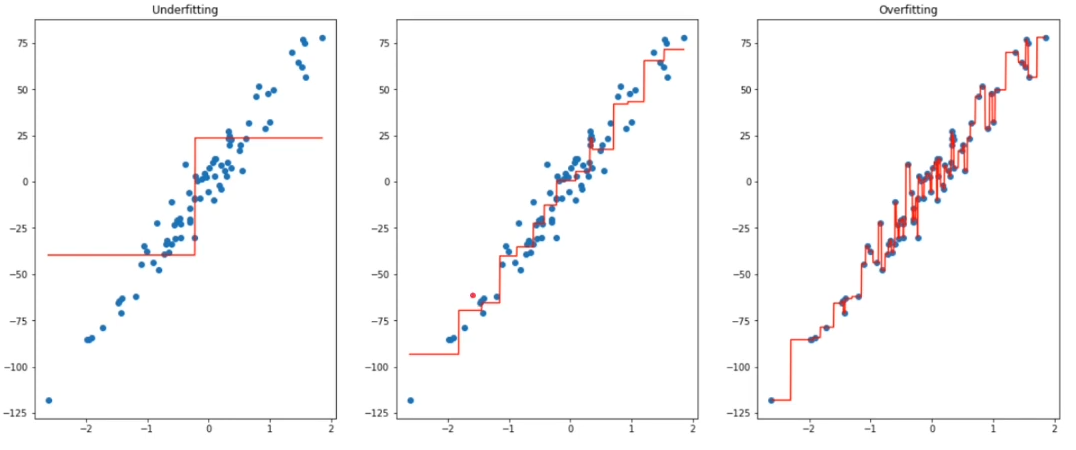

### Разложение ошибки на смещение и разброс (Bias-variance decomposition) - инфа из Yandex ML

Рассмотрим задачу регрессии с квадратичной функцией потерь.

Ошибку можно представить как сумму: смещение + дисперсия(разброс) + неустранимый шум в данных; - для квадратичной функции потерь (для других функций потерь похожая зависимость).

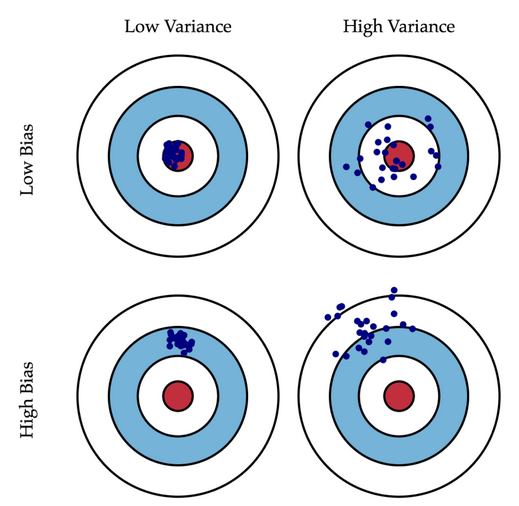

Большое смещение соответствует тому, что модели в среднем не попадают в цель, а при большом разбросе модели могут как делать точные предсказания, так и довольно сильно ошибаться.

- Смещение показывает, насколько хорошо с помощью данного алгоритма можно приблизиться к истинным ответам;  
- Дисперсия (разброс) характеризует чувствительность алгоритма к изменениям в обучающей выборке; 
- Шум - никак нельзя контролировать моделью. Это характеристика входных данных;  

ВАЖНО:   
Например, деревья маленькой глубины будут в большинстве случаев иметь высокое смещение и низкий разброс предсказаний, так как они не могут слишком хорошо запомнить обучающую выборку. А глубокие деревья, наоборот, могут безошибочно выучить обучающую выборку и потому будут иметь высокий разброс В ЗАВИСИМОСТИ ОТ ОБУЧАЮЩЕЙ, однако их предсказания в среднем будут точнее.

Bias-variance trade-off: Чем выше сложность обучаемой модели, тем меньше её смещение и тем больше разброс. Чем ниже сложность обучаемой модели, тем выше её смещение и тем меньше разброс.
График ниже призван показать, что существует оптимальная сложность модели, при которой соблюдается баланс между переобучением и недообучением и ошибка при этом минимальна.

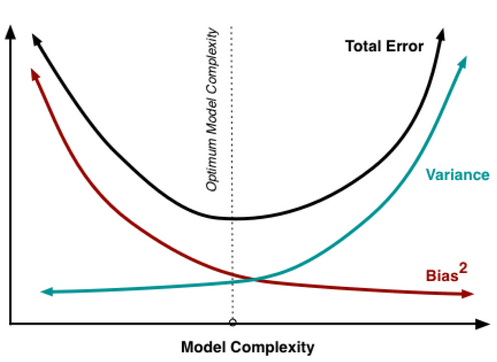

НО! Это выполняется не для всех алгоритмов ML (график ниже). Например, для нейронных сетей: с ростом их сложности может происходить снижение и разброса, и смещения.

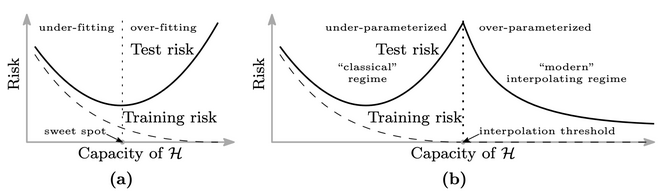

Слева — классический bias-variance trade-off: убывающая часть кривой соответствует недообученной модели, а возрастающая — переобученной. А на правой картинке — график, называемый в статье double descent risk curve. На этом графике - зависимость тестовой ошибки нейросетей от мощности множества входящих в них параметров H. Этот график разделён на две части пунктирной линией, которую называют interpolation threshold. Эта линия соответствует точке, в которой в нейросети стало достаточно параметров, чтобы без особых усилий почти идеально запомнить всю обучающую выборку. Часть до достижения interpolation threshold соответствует «классическому» режиму обучения моделей: когда у модели недостаточно параметров, чтобы сохранить обобщающую способность при почти полном запоминании обучающей выборки. А часть после достижения interpolation threshold соответствует «современным» возможностям обучения моделей с огромным числом параметров. На этой части графика ошибка монотонно убывает с ростом количества параметров у нейросети. Авторы также наблюдают похожее поведение и для «деревьев»: Random Forest и бустинга над решающими деревьями. Для них эффект проявляется при одновременном росте глубины и числа входящих в ансамбль деревьев.

### Метод градиентного спуска / функция потерь


Градиентный спуск — итеративный оптимизационный метод нахождения минимального значения функции потерь (ф-я потерь может быть разная) в завсимости от весов.   
Другими словами, в градиентном спуске,  НА ОБУЧЕНИИ МОДЕЛИ (метод fit) путём нахождения минимума функции потерь, мы настраиваем параметры (весы) модели.

ГИПЕРВАЖНО: Реализация градиентного спуска в n-мерном пространстве сводится к операциям над матрицами / векторами (пример ниже это покажет);   
Вектор-градиента функции потерь по весам (для разных наборов весов [разной точки] - разный вектор-градиента):   

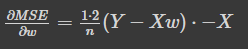 

Формула сверху верна как для BGD, так и SGD, MBGD.  

РЕМАРКА 1: Суть алгоритма в том, чтобы найти из пространства весов такую комбинацию, которая даст минимальное значение функции потерь (функцию потерь находим по данным из таблчки: X, Y, или x, y);  
РЕМАРКА 2: Поиск минимума означает получение наименьшей возможной ошибки или повышение точности модели.   
РЕМАРКА 3: В методе градиентого спуска находится вектор градиента функции потерь по каждому весу из набора w1, w2, ... wn.   
РЕМАРКА 4: Во время обучения градиентный спуск осуществляется в n-мерном пространстве, где n - количество параметров (весов);   
РЕМАРКА 5: dJ/dw (производная функции потерь) зависит от самой функции потерь. В линейной регрессии функция потерь - MSE;    
РЕМАРКА 6: В градиентном спуске веса в самом начале инициализируются случайными числами из нормального распределения;    
РЕМАРКА 7: В градиентном спуске определеяется минимальное значение epsilon=0.0001, на которое должны изменяться веса, иначе алгоритм остановится (признак того, что мы нашли минимум);     
РЕМАРКА 8: В градиентном спуске определяется максимальное число итераций max_iter поиска минимума функции; 
  
Важным гиперпараметром в градиентном спуске является коэффициент скорости обучения (learning rate: alpha): 
- Если alpha слишком большой, мы перепрыгнем через минимум;  
- Если alpha слишком маленький, мы используем слишком много итераций, чтобы добраться до минимума. Более того, в этом случае можно попасть в локальный минимум; 

Формула градиентного спуска для одного параметра - веса (частная производная вычисляется в точке):   

w_new = w_old - alpha * (dJ/dw)|w_old 

Формула сверху распространяется и на n-мерное пространство весов, в этом случае мы оперируем векторами и матрицами. 

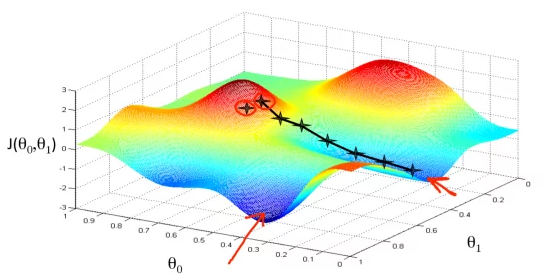

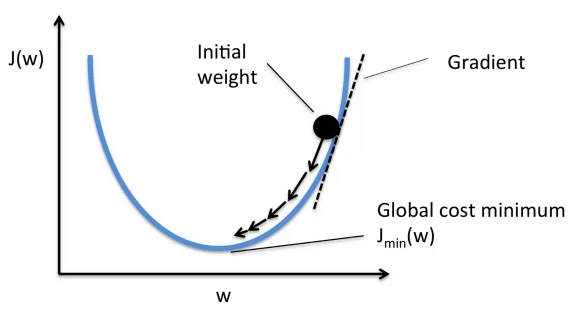


ТАБЛИЧНЫЕ ДАННЫЕ В ГРАДИЕНТНОМ СПУСКЕ (логика):
1. Берем точку весов на графике (n-мерное пр-во), где веса - плохие;   
2. Переходим к табличке, вычисляем для X_train, y_train - y_predict; y_predict- не является точным; 
3. Вычисляем MSE (на основе вычислений с таблицой). MSE - высокий, так как веса - плохие;  Поэтому надо попасть в такую область, где MSE - min.  

ВИДЫ ГРАДИЕНТНОГО СПУСКА:
- BATCH GRADIENT DESCENT (BGD): для обновления параметров модели используется вся выборка X_train; - Подбор весов более стабильный (но дольше);   
- STOCHASTIC GRADIENT DESCENT (SGD): вариант градиентного спуска, который обновляет параметры модели, используя только один случайно выбранный обучающий пример за итерацию;   
- MINI BATCH GRADIENT DESCENT (MBGD): вариант градиентного спуска, который обновляет параметры модели, используя небольшую случайно выбранную партию обучающих примеров за итерацию (MINI BATCH) - В ЭТОМ СЛУЧАЕ ОБУЧЕНИЕ БОЛЕЕ СТАБИЛЬНОЕ; 
 
РЕМАРКА ПО ВИДАМ ГРАДИЕНТНОГО СПУСКА:    
- BATCH GRADIENT DESCENT используют, когда датасет небольшого размера. В противном случае используют MINI BATCH GRADIENT DESCENT или STOCHASTIC GRADIENT DESCENT.
- В cлучае SGD, MINI BATCH GRADIENT DESCENT - очень важно на каждой итерации делать перемешивание данных (shuffle). 

НАСЧЁТ ФУНКЦИИ ПОТЕРЬ:   
Функция потерь - это математическая мера того, насколько модель ошибается в своих прогнозах по сравнению с правильными ответами в процессе обучения. В процессе обучения модель стремится минимизировать значение функции потерь, чтобы улучшить свои прогнозные способности.
Цель состоит в том, чтобы найти такие параметры модели, которые минимизируют эту низкое качество (функцию потерь) и делают ее предсказания более точными.

ВАЖНОСТЬ БАЛАНСА В ФУНКЦИИ ПОТЕРЬ:   
Хотя минимизация функции потерь - важный этап обучения модели, следует помнить, что слишком интенсивное уменьшение ошибки на тренировочных данных может привести к явлению, называемому переобучением.    
Поэтому баланс между минимизацией функции потерь на тренировочных данных и обобщением на новые данные - важная задача для машинного обучения.    

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import gc
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Создаём данные для обучения линейной регрессии методом градиентного спуска
X_train, y_train, coeffs = make_regression(n_samples=50, n_features=4, n_informative=4,
                               noise=10, coef=True, random_state=11)


# Добавляем свободный вес (смещение)
X_train = np.column_stack([X_train, np.ones((50))])
X_train[:5]

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699,  1.        ],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ,  1.        ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ,  1.        ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254,  1.        ],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489,  1.        ]])

##### Пример реализации градиентного спуска для обучения линейной регрессии

In [4]:
# Пример реализации BATCH GRADIENT DESCENT (SGD, MINI BATCH GRADIENT DESCENT - ПО АНАЛОГИИ)

def batch_gradient_descent(learning_rate: int, eps: int, weights: np.array, max_iter: int): 
    """
       Запуск градиентного спуска для обучения модели линейной регрессии.
       На каждой итерации считаем MSE, градиент функции потерь на всём обучающем X_train, y_train.
       Функцией потерь является MSE.
    """

    iter_list = []  
    mse_list = []
    next_weights = weights
    # Запускаем цикл градиентного спуска (обучения линейной регрессии)
    for iter in range(max_iter):
        cur_weights = next_weights

        # Делаем predict 
        y_pred = X_train @ cur_weights
        # Вычисление функции потерь: MSE
        mse_error = np.sum((y_train - y_pred) ** 2) / len(y_train)
        # Вычисляем вектор-градиент функции потерь по весам
        gradients = 2 / len(X_train) * (y_train - y_pred) @ (-X_train)
        # Находим вектор следующих весов по ф-ле град.спуска
        next_weights = cur_weights - learning_rate * gradients

        # Остановка когда достигнута необходимая степень точности
        print(f"Итерация: {iter}")
        print(f"Текущая точка {cur_weights} | Следующая точка {next_weights}")
        print(f"MSE: {mse_error}")
        print("--------------------------------------------------------")

        # Сохранение результатов в списки
        iter_list.append(iter)
        mse_list.append(mse_error)
    
        # Если ничего не меняется, то останавливаем обучение. Берём норму по всем векторам
        if np.linalg.norm(cur_weights - next_weights, ord=2) <= eps:
            print('Остановка обучения. Изменение весов меньше eps')
            break
    
    print(f'Найденные веса, обеспечивающие минимум функции потерь: {cur_weights}')
    return iter_list, mse_list


# Задаём размер шага: learning rate
learning_rate = 0.1
# Задаём минимальное значение, на которое должны изменяться веса
eps = 0.0001
# Задаём веса в начальной точке - вектор [0, 0, 0, 0, 0]
weights = np.zeros(X_train.shape[1])
# Задаём максимальное число итераций
max_iter = 100
# Запускаем градиентный спуск для обучения линейной регрессии
iter_list, mse_list = batch_gradient_descent(learning_rate, eps, weights, max_iter)
print(mse_list)

Итерация: 0
Текущая точка [0. 0. 0. 0. 0.] | Следующая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521]
MSE 7901.284047919273
--------------------------------------------------------
Итерация: 1
Текущая точка [11.76469989  8.02019663  7.1529662   3.12227706 -0.71246521] | Следующая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ]
MSE 5491.413352110748
--------------------------------------------------------
Итерация: 2
Текущая точка [21.07996752 15.00192791 13.15169841  5.97919733 -1.2826889 ] | Следующая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536]
MSE 3846.369420368778
--------------------------------------------------------
Итерация: 3
Текущая точка [28.48213061 21.0576616  18.18254548  8.55326802 -1.72604536] | Следующая точка [34.38479911 26.29452131 22.40202941 10.84471509 -2.06001325]
MSE 2714.9929661406427
--------------------------------------------------------
Итерация: 4
Текущая точка [34.38479911 26.29452131 22.40

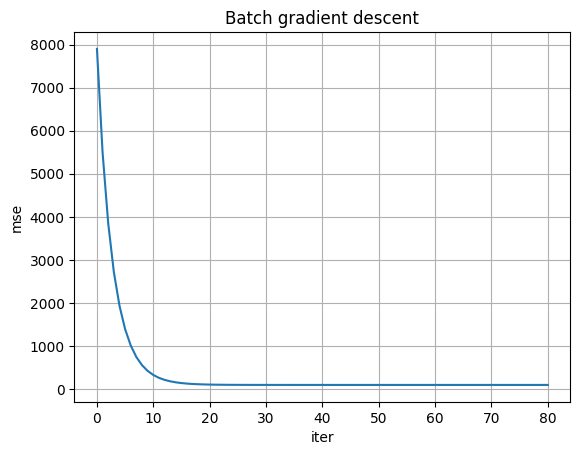

In [5]:
# Визуализация обучения BATCH GRADIENT DESCENT
plt.title('Batch gradient descent')
plt.xlabel('iter')
plt.ylabel('mse')
plt.plot(iter_list, mse_list)
plt.grid()
plt.show()

In [6]:
# Ура, всё сходится

# Обучение модели на тех же данных
model = LinearRegression()
model.fit(X_train, y_train)

# Посмотрим весa
sklearn_lin_weights = model.coef_
# Смещение - свободный вес
sklearn_lin_itercept = model.intercept_

sklearn_lin_weights = np.insert(sklearn_lin_weights, 4, sklearn_lin_itercept)[:5]
print(f'Найденные веса, обеспечивающие минимум функции потерь через sklearn: {sklearn_lin_weights}')

Найденные веса, обеспечивающие минимум функции потерь через sklearn: [59.51225616 57.72556421 44.70715115 24.87193091 -1.63929695]


### Регуляризация модели

Регуляризация модели - метод борьбы с переобучением модели, которая заключается в добавлении нового слагаемого (ШТРАФА за излишнюю сложность, или же говорят еще - смещения) в функцию потерь градиентного спуска.   

Регуляризация позволяет:
- Улучшить обобщающую способность модели (за счёт управления сложностью модели); 
- Уменьшить влияние шума в данных на модель; 

Регуляризация модели бывает: 
- l1 (Lasso) - может занулять веса; (Он может подходить также хорошо как метод отбора признаков);  
- l2 (Ridge) - не зануляет веса полностью (но, может приближать);      
- ElasticNet (l1 + l2);   

Математическая ремарка:   
L1 - норма (относится к l1 - Lasso): сумма весов, взятая по модулю;   
L2 - норма (относится к l2 - Ridge): корень из cуммы квадратов весов;   
 
Суть регуляризации, фактически, в том, чтобы бороться с "огромными весами", делая веса меньшими по модулю. 
Уровень штрафа можно варьировать (в sklearn - параметр alpha или C). В формуле градиентного спуска этот параметр называется ЛЯМБДА (АЛЬФА) - КОЭФФИЦИЕНТ РЕГУЛЯРИЗАЦИИ: 
- Если лямбда (альфа) слишком большое, то веса будут очень маленькие (для минимизации функционала, модель будет зашугана - это не решение проблемы) - В ЭТОМ СЛУЧАЕ СИЛА РЕГУЛЯРИЗАЦИИ ВЫСОКАЯ;    
- Если лямбда (альфа) слишком маленькое, то веса модели могут быть очень большие (для модели открывается свобода делать сколь угодно большие веса, причём функционал все еще будет в миниммуме) - В ЭТОМ СЛУЧАЕ СИЛА РЕГУЛЯРИЗАЦИИ НИЗКАЯ;  

alpha - коэффициент регуляризации:  
- В Ridge, Lasso, ElasticNet - передаём коэффициент alpha;  
- Например, в LogisticRegression - передаём;  

По поводу параметра C = 1 / alpha (логично, если отталкиваться от alpha):
- Чем меньше C, тем выше сила регуляризации (веса меньше);    
- Чем больше С, тем ниже сила регуляризации (веса больше);   

Регуляризация модели может быть как для задачи регрессии, так и для задачи классификации!


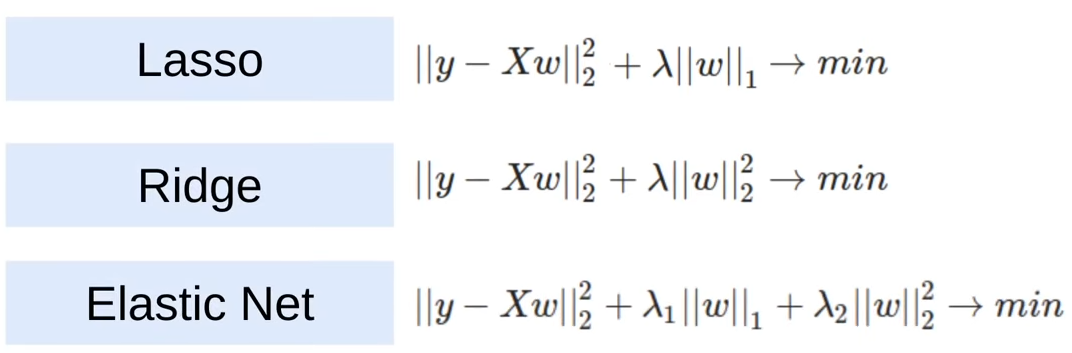

У ElasticNet есть еще один параметр (l1 ratio): 


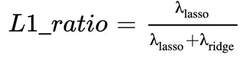

In [7]:
# Data separation
X, y = make_regression(n_features=4, n_informative=2, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=50)

# Scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Set alphas, model, coef path 
alphas = np.logspace(-7, 4, 10).tolist()  # Задаём параметр alpha

# Check regularization parameters 
def check_regularizarion(model, alphas): 
    df_result = pd.DataFrame(columns=["alpha", "train_metric", "test_metric"])
    for idx_alpha in range(len(alphas)):
        alpha = alphas[idx_alpha]
        model.set_params(alpha=alpha)
        model.fit(X_train, y_train)
        print(model.coef_)  # Show weights for the model
        
        train_score = model.score(X_train, y_train)  # Score on train
        test_score = model.score(X_test, y_test)  # Score on test
        df_result.loc[idx_alpha] = [alpha, train_score, test_score]
    print(df_result)


print('\nCoefficient for Lasso')
check_regularizarion(Lasso(), alphas)

print('\nCoefficient for Ridge')
check_regularizarion(Ridge(), alphas)
gc.collect()


Coefficient for Lasso
[9.55045618e+01 5.10026204e-06 3.49268850e-06 3.85178034e+01]
[9.55045600e+01 3.73329075e-06 1.79740819e-06 3.85178022e+01]
[95.50453003  0.          0.         38.51777778]
[95.50409176  0.         -0.         38.51735783]
[95.49707473  0.         -0.         38.51034164]
[95.38004344  0.         -0.         38.39330384]
[93.4277333   0.         -0.         36.44099976]
[60.86133464  0.         -0.          3.8746013 ]
[ 0.  0. -0.  0.]
[ 0.  0. -0.  0.]
          alpha  train_metric  test_metric
0  1.000000e-07      1.000000     1.000000
1  1.668101e-06      1.000000     1.000000
2  2.782559e-05      1.000000     1.000000
3  4.641589e-04      1.000000     1.000000
4  7.742637e-03      1.000000     1.000000
5  1.291550e-01      0.999997     0.999997
6  2.154435e+00      0.999177     0.999144
7  3.593814e+01      0.771132     0.761830
8  5.994843e+02      0.000000    -0.019232
9  1.000000e+04      0.000000    -0.019232

Coefficient for Ridge
[ 9.55045382e+01  2.0

3586

In [8]:
# ElasticNet: example of creation model

l1_ratios = list(np.linspace(0, 1, 5))  # l1_ratio: [0, 1]
# For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty
print(f'l1_ratios = {l1_ratios}')
elasticnet = ElasticNet(alpha=50, l1_ratio=0.5)  # Example

l1_ratios = [0.0, 0.25, 0.5, 0.75, 1.0]


### Preprocessing данных

Preprocessing данных - наиважнейший этап ML пайплайна. От него зависит, будет ли модель обучаться на качественных данных или нет. Чтобы данные получились качественные, необходимо знать методы обработки данных для разных задач (классификация, регрессия, кластеризация, понижение размерности) - у каждой задачи свой индивидуальный подход к обработке данных.

ГИПЕРВАЖНО: ВСЕГДА Прежде чем делать Preprocessing данных, необходимо убедиться, что данные правильно разделены на train, test (или train, test, valid) - в зависимости от подхода. Т.Е СНАЧАЛА TRAIN_TEST_SPLIT ----> ПОТОМ DATA PREPROCESSING;   
ГИПЕРВАЖНО: Preprocessing данных зависит от конкретного случая (надо экспериментировать с подходом). Это многоуровневый итеративный процесс (также как создание ракеты);  

Data preprocessing steps:
1) Обработка пропусков;   
2) Обработка выбросов;  
3) Отбор признаков (совмещать несколько методов и смотреть какой лучше работает);
4) Масштабирование признаков (Масштабирование признаков ВСЕГДА НАДО ДЕЛАТЬ ПОСЛЕДНИМ ЭТАПОМ - ПОСЛЕ Feature engineering);  

Таким образом: 1) Data preprocessing ---> 2) Feature engineering ---> 3) Data preprocessing (масштабирование);

### 1) Обработка пропусков

Виды обработки пропусков:
- Заполнить средним зн-ем; медианой; модой; min; max; - Чаще всего медианой заполняется;
- Удалить пропуски (надо смотреть на кол-во пропусков для объекта, для столбца - можно удалять по процентам, т.е. создать функцию def для уд-я);
- Ничего не делать (такое себе, на самом деле);

ВАЖНО: Если в категориальных признаках имеются пропуски, то их лучше заполнять модой. Таким образом, стратегия заполнения столбцов зависит от вида данных в столбцах (количественные, категориальные и тд);   
ВАЖНО: Для обработки пропусков удобно использовать импутацию. Импутация данных - заполнение данных чем-либо (модой, медианой, средним).  

Класс sklearn.impute import SimpleImputer - реализует импутацию данных:
- При использовании SimpleImputer необходимо также запускать fit, transform (или fit_transform). На fit подаём X_train, так как статистики должны считаться на X_train!;  
- SimpleImputer может работать с list, tuple, np.array, sparse_matrix, DataFrame;  
- Статистики считаются в этом случае без учёта np.nan;
- Статистики считаются по столбцам;  

In [9]:
from sklearn.impute import SimpleImputer


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
example_data = np.array([[np.nan, 1, 2],
                            [3, np.nan, 4],
                            [5, 6, np.nan]])

imp.fit_transform(example_data)

array([[4. , 1. , 2. ],
       [3. , 3.5, 4. ],
       [5. , 6. , 3. ]])

In [10]:
# Импутация на тесте. Данные заполняются статистиками, которые вычислены на трейне. НА ТЕСТЕ СТАТИСТИКИ НЕ СЧИТАЮТСЯ!
imp.transform([[np.nan, 1, 4], [10, np.nan, 11], [11, np.nan, 13]])

array([[ 4. ,  1. ,  4. ],
       [10. ,  3.5, 11. ],
       [11. ,  3.5, 13. ]])

In [11]:
# Просмотр выбранной статистики
imp.statistics_

array([4. , 3.5, 3. ])

### 2) Обработка выбросов

Виды обработки выбросов: 

- Заполнить средним зн-ем; медианой; модой; min; max; - Чаще всего медианой заполняется;  
- Удалить выбросы - надо смотреть по ситуации, если данных слишком много то жалко удалять;    
- Ничего не делать (такое себе, на самом деле);  

ВАЖНО: Выбросы можно обнаружить при помощи гистограммы или боксплотов; А также можно смотреть как на квантили в табличке (например, квантиль 0.2, квантиль 0.975). Также выбросы (аномалии) можно обнаружить при помощи специальных алгоритмов, которые реализованы в Sklearn (Local Outlier Factor, Isolation Forest, DBSCAN);   

Выбросы могут быть как адекватные, так и неадекватные:
- Адекватный выброс хранит в себе ценную информацию (его не стоит тупо брать и удалять);
- Неадекватный выброс следует подвергнуть обработке; 

In [12]:
class RemoveOutliers(TransformerMixin):
    """Класс для удаления выбросов интерквартильным методом"""

    def __init__(self, q_25=None, q_50=None, q_75=None):
        """init хранятся статистики по всем признакам!"""
        self.q_25 = q_25   
        self.q_50 = q_50 
        self.q_75 = q_75
    

    def fit(self, X: pd.DataFrame, y=None): 
        """fit вычисляем статистики по всем признакам на train"""
        self.q_25 = X.quantile(q=0.25)
        self.q_50 = X.quantile(q=0.50)
        self.q_75 = X.quantile(q=0.75)
        return self
    
    
    def transform(self, X: pd.DataFrame):
        """Замена выбросов на квантили по всем признакам как на train, так и на test"""
        for column in X.columns:
            q_3 = self.q_75[column]
            q_1 = self.q_25[column]
            iqr = q_3 - q_1
            upper_bound = q_3 + 1.5 * iqr
            lower_bound = q_1 - 1.5 * iqr
            X.loc[X[column] > upper_bound, column] = q_3
            X.loc[X[column] < lower_bound, column] = q_1
        return X

### 3) Отбор признаков

In [13]:
# Вернуться сюда после изучения статистики
# Shuffle / Target permutation / Boruta / RFE — для отбора фич

### 4)  Масштабирование данных

ВАЖНО: Масштабирование данных необходимо для более стабильного обучения модели;  
ВАЖНО: В случае масштабирования данных всегда нужно вызывать метод fit (или же fit_transform) от X_train, потому что статистические характеристики (медиана, среднее, квантили, дисперсия, std) считаются на основе X_train !!!!!!!!!  
ВАЖНО: Для X_test и в prode вызывается метод transform, так как статистики уже будут посчитаны на X_train  
ВАЖНО: В случае использования деревьев и их производных (gradientboosting, catboost, lightgbm, xgboost, randomforest ...) масштабирование не имеет смысла  
ВАЖНО: В зависимости от выбранного масштабирования распределение признаков будет меняться!!!


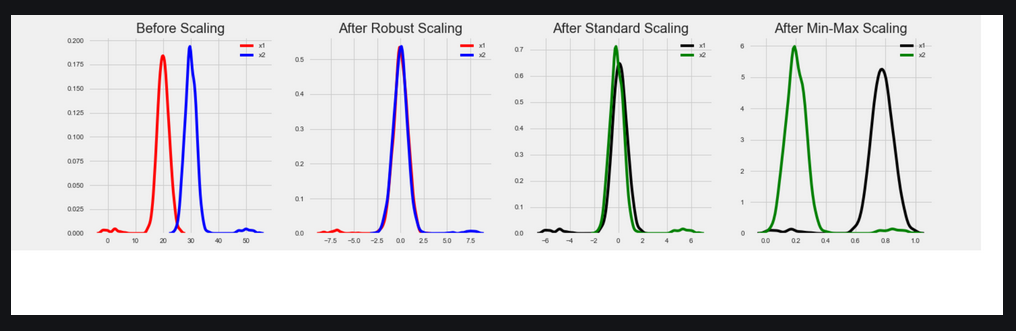

In [14]:
s_train_data = np.array([[1, 20, 31], [40, 50, 6], [70, 8, 9]], dtype='int8')
s_test_data = np.array([[1, 2, 3]])

##### 4.1) Стандартизация данных

Формула стандартизации данных (для каждой фичи):

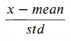

После стандартизации у признака будет std = 1, mean = 0;  
Стандартизация лучше зарекомендовала себя в линейных моделях;   


In [15]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Создаём объект класса 

scaler.fit(s_train_data)  # Обучение. На этом этапе вычисялем статистики. ПРИ ЭТОМ САМИ ДАННЫЕ НЕ МЕНЯЮТСЯ

print(scaler.transform(s_test_data))  # Преобразование тестовых данных

[[-1.27438619 -1.35873244 -1.10657492]]


In [16]:
# Дисперсия для каждого признака (получилась по итогу обучения в fit X_train)
scaler.var_

array([798.        , 312.        , 124.22222222])

In [17]:
# Среднее для каждого признака (получилась по итогу обучения в fit X_train)
scaler.mean_

array([37.        , 26.        , 15.33333333])

#### 4.2) Нормализация данных

Формула нормализации данных (для каждой фичи):  

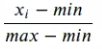

После нормализации данных фича будет в диапазоне [0, 1];   
Нормализация хорошо зарекомендавала себя в моделях, которые работают с расстояниями (KNN, weight KNN), а также в нейронных сетях;  

In [18]:
# MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler


mms = MinMaxScaler()  # Создаём объект класса 

mms.fit(s_train_data)  # Обучение. На этом этапе вычисляем статистики. ПРИ ЭТОМ САМИ ДАННЫЕ НЕ МЕНЯЮТСЯ

print(mms.transform(s_test_data))  # Преобразование тестовых данных

[[ 0.         -0.14285714 -0.12      ]]


In [19]:
# Минимум в обучающих данных
mms.data_min_

array([1., 8., 6.])

In [20]:
# Максимум в обучающих данных
mms.data_max_

array([70., 50., 31.])

#### 4.3) RobustScaler

В отличие от StandardScaler при масштабировании RobustScaler вычитает из данных медиану и делит результат на интерквартильный размах (75% квантиль - 25% квантиль). 
RobustScaler, также как и StandardScaler, лучше работает с линейными моделями. RobustScaler применяется в тех случаях, когда в данных много выбросов (в этом случае работает лучше, чем StandardScaler).

По хорошему, необходимо проводить сравнение между StandardScaler и RobustScaler (смотреть гистограммы и выбирать лучшее).

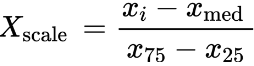

In [21]:
# RobustScaler 

from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(25.0, 75.0))

rs.fit(s_train_data)

print(rs.transform(s_test_data))  # Преобразование тестовых данных

[[-1.13043478 -0.85714286 -0.48      ]]


In [22]:
rs.center_  # Медина каждого признака на обучении

array([40., 20.,  9.])

In [23]:
rs.transform(s_train_data)

array([[-1.13043478,  0.        ,  1.76      ],
       [ 0.        ,  1.42857143, -0.24      ],
       [ 0.86956522, -0.57142857,  0.        ]])

### Генерация новых признаков (Feature engineering)

Генерацию новых признаков - важный этап для правильного обучения модели МО. Важно с умом проводить этот этап, например, для алгоритмов, которые хорошо работают с категориальными признаками, генерировать много полезных категориальных признаков.  
Необходимо как можно больше генерировать как категориальных, так и количественных признаков (в зависимости от применяемого алгоритма). Если сгенерированные признаки будут бесполезны (их пользу можно оценить на этапе отбора признаков) то их можно будет удалить и не использовать.  

ВАЖНО: Генерацию признаков, по существу, проводят для того, чтобы модель правильно обучалась. Мы модели как бы подсказываем куда надо смотреть в процессе обучения;   
ВАЖНО: Таким образом, генерацию признаков надо делать отталкиваясь от логики решаемой задачи;

ПАМЯТКА: При работе с линейными моделями не надо создавать много новых категориальных переменных;  
ПАМЯТКА: После генерации признаков обязательно надо делать масштабирование (кроме деревьев);  

ИМБА: Для генерации категориальных признаков есть отличная библиотека - category_encoders;

#### 3.1) Генерация при категориальных признаках

#### - Перевод в порядковые числа (Label encoding в sklearn)

У Label Encoder есть одна проблема. Алгоритм обучения теперь предположит, что зеленый цвет больше синего, а красный больше зеленого. Хотя это допущение является неправильным, алгоритм все равно способен произвести полезные результаты.      
(Label Encoder) отлично подходит для работы с порядковыми категориальными переменными. 

In [24]:
# Кодирование меток в числа 0, 1, 2...
from sklearn.preprocessing import LabelEncoder

enc_data = ['Белый', 'Чёрный', 'Жёлтый', 'Синий', 'Красный', 'Зелёный']
color_le = LabelEncoder()
color_le.fit_transform(enc_data)

array([0, 5, 1, 4, 3, 2], dtype=int64)

In [25]:
# Далее обученный LabelEncoder можно использовать в prod-e
# ВАЖНО: чтобы все новые метки в prode присутствовали на обучающем наборе
color_le.transform(['Красный', 'Белый'])

array([3, 0])

In [26]:
# Обратный переход
color_le.inverse_transform(np.array([3, 0]))

array(['Красный', 'Белый'], dtype='<U7')

#### - Перевод в количественные числа (Feature encoding)  

В Feature encoding для категориальных переменных (например, ISLAND, INLAND, NEARBAY в задаче предсказания стоимости дома) считаются стастические данные для каждой категории по какому-либо признаку, например медиана стоимости квадратного метра дома по каждой категории;   
В Feature encoding мы для категориальной переменной генерируем количественную переменную; Этот подход может быть полезен в случае, когда используется алгоритм, который хорошо работает с количественными признаками;

#### - Бинарные дамми переменные (OneHotEncoder in sklearn)

Бинарное кодирование (OneHotEncoding кодирование) - это когда для каждого уникального значения в категориальном столбце создается новый столбец. Затем эти фиктивные переменные заполняются нулями и единицами — 1 означает ИСТИНА, 0 означает ЛОЖЬ

У OneHotEncoding тоже есть одна проблема - разреженность в данных.   
OneHotEncoding можно делать через Pandas - pd.get_dummies(df['Цвет'])

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc_data = pd.DataFrame(data=['Белый', 'Черный', 'Белый', 'Зеленый'], columns=['Цвет'])
                    
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(enc_data)

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [28]:
# Далее обученный OneHotEncoder можно использовать в prod-e
ohe.transform([['Белый']])

array([[1., 0., 0.]])

In [29]:
# Обртный переход
ohe.inverse_transform(np.array([[1, 0, 0],
                                [0, 0, 1],
                                [1, 0, 0],
                                [0, 1, 0]]))

array([['Белый'],
       ['Черный'],
       ['Белый'],
       ['Зеленый']], dtype=object)

#### Frequency encoding - часто исп-ся на Kaggle

https://letsdatascience.com/frequency-encoding/ - инфа здесь 

ИМБА!!!!

https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark

https://www.thetalkingmachines.com/article/how-deal-categorical-data-machine-learning

Frequency encoding - это метод кодирования, который кодирует значения категориальных признаков в соответствии с их частотами. Частоты считаем на выборке X_train

Frequency encoding может давать реальный прирост на метрике. В случае, когда целевая переменная в некоторой степени связана с частотой появления категории - это делает модель умнее. 

Когда пользоваться Feature encoding:
- Когда много уникаьных категорий в признаке; 
- Когда есть корреляция между частотой появления категории и целевой переменной; 
- Когда используются деревья (ансамбли и тд);  


Преимущества Feature encoding:
- Простота реализации;
- Не расширяет признаковое пространство (в отличие от ohe);
- Хорошо работает с деревьями (всевозможные ансамбли);

Недостаток Feature encoding:   
Мы можем потерять ценную информацию, если есть две разные категории с одинаковым количеством наблюдений — это потому, что мы заменяем их одним и тем же числом.

In [21]:
df = pd.DataFrame(data=['Белый', 'Черный', 'Белый', 'Зеленый'], columns=['color'])
frequency = df['color'].value_counts()
df['enc_data'] = df['color'].map(frequency)
df

,color,enc_data
0,Белый,2
1,Черный,1
2,Белый,2
3,Зеленый,1


#### Mean target encoding - часто исп-ся на Kaggle

#### 3.2) Генерация при количественных признаках 

#### - Feature discretization

Рассмотрим для стоимости дома. В этом случае для количественного признака получается категориальный признак. Например, для стоимости квадратного метра дома сделать следующие категории: 0 - плохой дом; 1 - средний дом; 2 - хороший дом; 3 - отличный дом;

#### - Feature binarization

В этом случае также для количественного признака получается категориальный признак. Только здесь будет ОНЛИ две категории: 0 - плохой дом; 1 - отличный дом;

### Разделение данных: train_test_split

#### Разделение на train, test:

In [30]:
# Разделение на train, test 
from sklearn.model_selection import train_test_split

X = np.array([[10, 42, 21],
              [18, 21, 20],
              [31, 12, 94],
              [21, 42, 12],
              [21, 53, 62],
              [31, 24, 21],
              [23, 535, 31]])

y = np.array([0, 0, 1, 1, 0, 1, 0])

# Инфа из Yandex ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)  # test_size = 0.2 - ПРИНЯТО ТАК СТАВИТЬ
# Посмотрим X_train
X_train

array([[ 31,  24,  21],
       [ 31,  12,  94],
       [ 21,  53,  62],
       [ 21,  42,  12],
       [ 23, 535,  31]])

In [31]:
# Зачем нужен гиперпараметр random_state?
# Random state нужен, чтобы зафиксировать одно и то же перемешивание. Если DS проект ведется с коллегами, то при shuffle у DS-ра и у его коллег при shuffle датасета, постоянно будет меняться разбиение датасета. random_state фиксирует это разбиение
# Например, если DS-ер и его коллеги поставят shuffle и random_state=50, то у них будет одно и то же перемешивание! Поэтому random_state НУЖЕН ВСЕГДА!!!! Чтобы минимизировать случайность при оценке
# !!! random_state нужен только там, где есть shuffle! 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=50)  # поставим другой random_state, разбиение будет уже другое
# Посмотрим на X_train при другом random_state
X_train

array([[ 21,  53,  62],
       [ 18,  21,  20],
       [ 21,  42,  12],
       [ 23, 535,  31],
       [ 10,  42,  21]])

#### Разделение на train, test, valid:

In [32]:
X = np.array([[5, 2, 1],
              [1, 2, 20],
              [3, 1, 9],
              [2, 4, 1],
              [2, 5, 2],
              [3, 2, 2],
              [2, 55, 3],
              [8, 2, 11]])

y = np.array([0, 0, 1, 1, 0, 1, 0, 1])

# Инфа из Yandex ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)  # Сначала разбиваем на train, test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42)  # Далее train делим на train и val, причем размер val = 0.1 * train

### Кривые валидации, обучения (validation, learning curves)

Как кривая валидации, так и кривая обучения внутри делают кросс-валидацию.   
Более того, как в кривой валидации, так и в кривой обучения, необходимо строить кривую на train и на test. 

- Кривая валидации представляет собой зависимость метрики от гиперпараметра. 
- Кривая обучения представляет собой зависимость метрики от размера обучающей выборки X_train. При этом параметры модели фиксируются заранее. 

При помощи кривой валидации можно узнать: 
- Влияние гиперпараметра (важного! Например, регуляризацию) на метрику;  
- Недообучение/переобучение при разных значениях гиперпараметра; 

При помощи кривой обучения можно узнать: 
- Помогут ли нам новые тренировочные данные для увеличения метрики;  
- Недообучение/переобучение при разных значениях размера выборки X_train;  
 
Как читать эти кривые:   
Если метрика как на трейне, так и на валидации низкая, то модель недообучена. Если метрика на трейне высокая, а на валидации низкая, то модель переобучена. Если метрики и на трейне и на тесте похожи, то модель очень хорошая. 

In [33]:
from sklearn.model_selection import validation_curve, learning_curve, KFold, ValidationCurveDisplay, LearningCurveDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Train test split
X, y = load_iris(return_X_y=True)
X_train, X_Test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=50)

# Set param_range
param_range = np.logspace(-7, 3, 3)

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=50)

# load model
classifier = SVC(kernel="linear")

In [34]:
# VALIDATION CURVE 1 
train_scores1, valid_scores1 = validation_curve(classifier,
                                                X_train, y_train,
                                                param_name="C",
                                                param_range=param_range,
                                                cv=kf,
                                                scoring="f1_macro")


print(f'Train scoring (valid curve) for n_splits=5:\n{train_scores1}\n')
print(f'Valid scoring (valid curve) for n_splits=5:\n{valid_scores1}')

Train scoring (valid curve) for n_splits=5:
[[0.17630854 0.17222222 0.55344139 0.17886179 0.1707989 ]
 [0.83819194 0.81705426 0.81705426 0.95308642 0.85898942]
 [0.98824621 0.98864839 1.         0.98828968 0.98886104]]

Valid scoring (valid curve) for n_splits=5:
[[0.15555556 0.15555556 0.54191033 0.14285714 0.16091954]
 [0.76911977 0.85026738 0.85026738 0.91111111 0.8968254 ]
 [1.         0.95213675 0.95213675 0.95681511 0.94871795]]


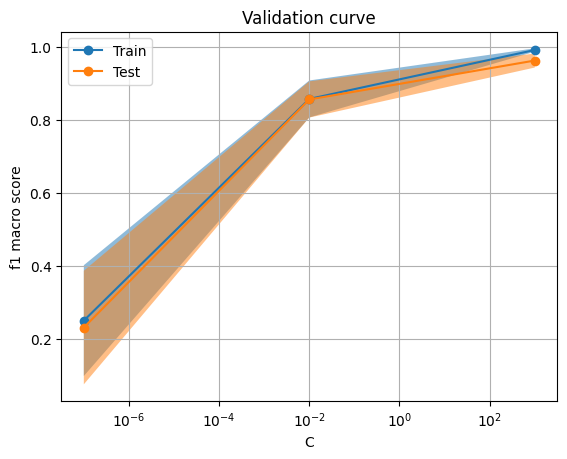

In [35]:
# # VALIDATION CURVE 2 
ValidationCurveDisplay.from_estimator(classifier,
                                      X_train, y_train,
                                      param_name="C",
                                      param_range=param_range,
                                      cv=kf,
                                      scoring='f1_macro', 
                                      line_kw={"marker": "o"})

plt.grid()
plt.title('Validation curve')
plt.xlabel("C")
plt.ylabel("f1 macro score")
plt.show()

In [36]:
# LEARNING CURVE 1

# Set train sizes 
train_sizes = [33, 50, 89]

train_sizes, train_scores2, valid_scores2 = learning_curve(classifier,
                                                           X_train, y_train,
                                                           train_sizes=train_sizes,
                                                           cv=kf,
                                                           scoring='f1_macro')

print(f'Train scoring (learning curve) for n_splits=5:\n{train_scores2}\n')
print(f'Valid scoring (learning curve) for n_splits=5:\n{valid_scores2}')

Train scoring (learning curve) for n_splits=5:
[[1.         1.         1.         1.         1.        ]
 [0.97755331 0.97755331 1.         0.97849462 0.97714286]
 [0.98824621 0.98864839 0.98847491 0.98809144 0.97734255]]

Valid scoring (learning curve) for n_splits=5:
[[0.91534392 1.         0.95213675 0.95816993 0.94871795]
 [1.         1.         0.95213675 0.95681511 0.94871795]
 [1.         1.         0.95213675 0.95681511 0.94871795]]


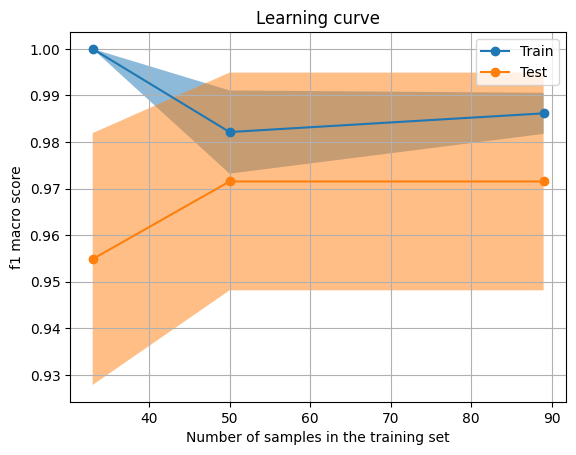

In [37]:
# LEARNING CURVE 2

LearningCurveDisplay.from_estimator(classifier,
                                    X_train, y_train,
                                    train_sizes=train_sizes,
                                    cv=kf,
                                    scoring='f1_macro', 
                                    line_kw={"marker": "o"})

plt.grid()
plt.title('Learning curve')
plt.xlabel("Number of samples in the training set")
plt.ylabel("f1 macro score")
plt.show()

### Pipeline в sklearn

Все экземпляры конвейера должны обязательно обладать этими методами:
- fit;  
- transform;  

Также можно определить метод fit_transform, если в Pipeline есть этап с кастомным классом (мб удобно и эффективно для моделирования и преобразования обучающих данных сразу) - но есть TransformerMixin

ГИПЕРВАЖНО: Все шаги конвейера, кроме последнего, должны быть преобразователями (т.е. должны иметь метод transform). Последний шаг может быть любого типа (преобразователь, классификатор, регрессор и т.д.)  
ГИПЕРВАЖНО: При вызове метода predict сначала отрабатывают преобразователи данных с их встроенными методами transform, а в конце отрабатывает estimator и делает predict   
ГИПЕРВАЖНО: В конвейеры можно вставлять и свои пользовательские экземпляры классов, и функции трансформеры   
ГИПЕРВАЖНО: В production-е весь ML процесс должен быть в виде конвейера  
ГИПЕРВАЖНО: Конвейер обеспечивает удобство и герметичность в ML проекте   
ГИПЕРВАЖНО: Конвейер с кастомными классами можно внедрять в GridSearch + CrossValidation. Можно проводить оптимизацию гиперпараметров разных этапов конвейера (PCA, LogReg). Использование конвейера обеспечивает соответствующее масштабирование образцов в каждой итерации - ЭТО ПРАВИЛЬНО    
ГИПЕРВАЖНО: Если имеет место кросс-валидация, то в кросс-валидацию подаётся весь ПАЙПЛАЙН!   

ГИПЕРГИПЕРВАЖНО: При работе с конвейером метод fit ЗАПУСКАЕТСЯ ОДИН РАЗ (далее на всех этапах, кроме последнего запускаются методы fit и transform), на последнем этапе - эстиматор, запускается метод fit  
ГИПЕРГИПЕРВАЖНО: Пусть конвейер состоит из следующих этапов: 1) StandardScaler 2) PCA 3) LogisticRegression. Когда мы запустили конвейер методом fit, объект StandardScaler применил к тренировочным данным методы fit и transform, и затем масштабированные тренировочные данные были переданы в следующий объект конвейера, РСА. Аналогично предыдущему шагу объект РСА также применил к масштабированным входным данным методы fit и transform и передал их заключючительному элементу конвейера, оценщику (LogisticRegression).   
 ПРИНЦИП ЗАПУСКА МЕТОДА fit  НИЖЕ В РИСУНКЕ:


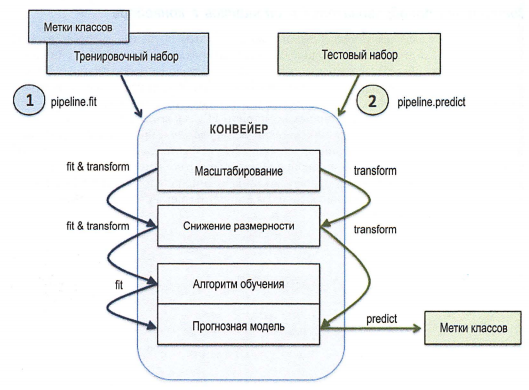

ГИПЕРГИПЕРВАЖНО: При работе с GridSearch + CrossValidation + Pipeline, для комбинации гиперпараметров метод fit pipeline-а запускается для тренировочных блоков (в свою очередь у каждого шага pipeline-а запускается методы fit transform, а в конце fit), а для валидационного блока запускается метод score pipeline-a (в свою очередь при вызове метода score pipeline-a запускается методы transform для каждого шага, а в конце score от эстиматора) 


In [38]:
# ПУТЬ 1: (Pipeline - с указанием названия шага пайплайна)

from sklearn.pipeline import Pipeline  # ПОИСК КЛАССА ПАЙПЛАЙН
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pipe1 = Pipeline([('reduce_dim', PCA()), ('clf', SVC(C=20))])

pipe1.fit(np.array([[0, 3, 2], [3, 1, 1], [3, 2, 9]]),  # Задаём X 
          np.array([0, 0, 1]))  # Задаём y

pipe1.predict(np.array([[0, 1, 0]]))

array([0])

In [39]:
# ПУТЬ 2: (make_pipeline - он автоматически заполняет имена шагов конвейера)

from sklearn.pipeline import make_pipeline  # ПОИСК КЛАССА ПАЙПЛАЙН
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

pipe2 = make_pipeline(Binarizer(), MultinomialNB())  

pipe2.fit(np.array([[1, 6, 2], [3, 8, 1], [3, 9, 1]]),  # Задаём X
          np.array([1, 0, 1]))  # Задаём y

pipe2.predict(np.array([[1, 0, 1]]))

array([1])

In [40]:
# ВАЖНО: Доступ к шагам конвейера
print(f'Шаги конвейера: {pipe2.steps}')
print(f'Тип return-a от доступа к шагам конвейера: {type(pipe2.steps)}')

Шаги конвейера: [('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())]
Тип return-a от доступа к шагам конвейера: <class 'list'>


In [41]:
# Доступ к отдельным шагам конвейера: ПРИМЕР 1
print(pipe2[0])  # доступ по индексу

# Доступ к отдельным шагам конвейера: ПРИМЕР 2
print(pipe2['binarizer'])  # доступ по названию шага

Binarizer()
Binarizer()


In [42]:
# ГИПЕРВАЖНО: доступ к гиперпараметрам конвейера: --- ЭТО ВАЖНО ПРИ ПОИСКЕ ПО СЕТКЕ!!!
# 1) Пишем сначала полное название шага конвейера
# 2) Далее ставим __ 
# 3) Пишем название гиперпараметра

pipe1.set_params(clf__C=10)

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC(C=10))])

### ColumnTransformer в Sklearn

ColumnTransformer позволяет преобразовывать различные столбцы или подмножества столбцов входных данных по отдельности, и объекты, сгенерированные каждым трансформаторов, будут объединены для формирования единого пространства объектов (чтобы кол-во признаков в датасете осталось прежним). Это полезно для разнородных или столбчатых данных, чтобы объединить несколько механизмов извлечения признаков или преобразований в единый трансформатор.  

СolumnTransformer делает параллельную обработку (а не последовательную, в отличие от Pipeline); 

ВАЖНО: ColumnTransformer впихнуть во внешний Pipeline (полезно когда столбцы датасета обрабатываются независимо друг от друга);  Также ColumnTransformer может иметь внутренние пайплайны для независимой обработки - решение исп-ся в prod;   
ВАЖНО: СolumnTransformer принимает на вход list, np.array, DataFrame; Причём на вход transform, fit_transform... подаётся целый датасет X;  
ВАЖНО: В случае использования array, необходимо на каждый tuple указывать индекс столбца, вместо его названия; - более здравый подход и с DataFrame;  

ГИПЕРВАЖНО: СolumnTransformer можно впаять в GridSearch, OptunaSearch и такое делается часто!;   
ГИПЕРВАЖНО: ColumnTransformer имеет возможность обучаться, т.е. fit, fit_transform;  
ГИПЕРВАЖНО: ColumnTransformer не имеет метода predict, score. У него в конце не должен быть объект с методом predict (LogReg, SVM и тд!);  
ГИПЕРВАЖНО: Если в ColumnTransformer на один трансформатор подать 3 столбца (указать в tuple эти столбцы), то на выходе из трансформера он даст 3 столбца (если в трансформерах нет генераций новых признаков);  


ГИПЕРГИПЕРВАЖНО: На практике ColumnTransformer ЧАСТО используют, когда в датасете имеются как количественные данные, так и текстовые. На количественные данные создают свой  пайплайн, а на текстовые - свой отдельный пайплайн. Эти два пайплайна объединяются в ColumnTransformer. То есть внутри ColumnTransformer имеется два внутренних пайплайна, независимых друг от друга! Другими словами, если в датасете имеются столбцы, которые ну никак не влияют друг на друга, то в рамках их обработки можно юзать ColumnTransformer! А потом сам ColumnTransformer помещают во внутрь внешнего Pipeline, чтобы делать predict, predict_proba, score ...

Методы ColumnTransformer:
- fit;  
- transform;  
- fit_transform;  
- get_params;  
- set_params;  

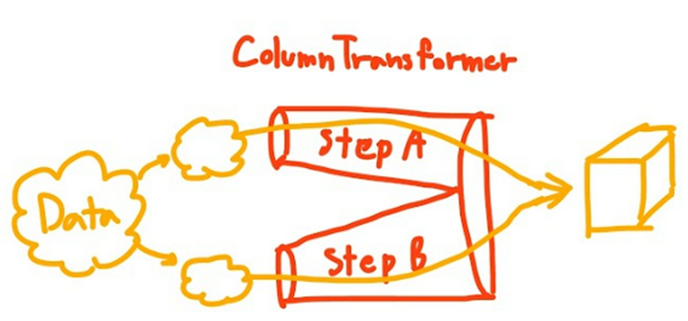

##### Пример 1: работa c ColumnTransformer

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd


X = pd.DataFrame({'age': [10, 20, 30, 40], 'balance': [400, 600, 800, 1000], 'kernel': ['White', 'Black', 'Green', 'Yellow'], 'sex': ['male', 'female', 'male', 'female']})


def change_num1(X: pd.DataFrame, y=None):
    """Функция для работы с колонкой age"""
    return X + 10 


def change_num2(X: pd.DataFrame, y=None):
    """Функция для работы с колонкой balance"""
    return X - 100


trans1 = FunctionTransformer(change_num1)
trans2= FunctionTransformer(change_num2)


ct = ColumnTransformer([("tr1", trans1, ["age"]), ("tr2", trans2, ["balance"]), ("tr3", OneHotEncoder(), ['kernel', 'sex'])])
ct.fit_transform(X)

array([[ 20., 300.,   0.,   0.,   1.,   0.,   0.,   1.],
       [ 30., 500.,   1.,   0.,   0.,   0.,   1.,   0.],
       [ 40., 700.,   0.,   1.,   0.,   0.,   0.,   1.],
       [ 50., 900.,   0.,   0.,   0.,   1.,   1.,   0.]])

In [7]:
# Посмотрим на ColumnTransformer
ct 

ColumnTransformer(transformers=[('tr1',
                                 FunctionTransformer(func=<function change_num1 at 0x000001CD17DDAC00>),
                                 ['age']),
                                ('tr2',
                                 FunctionTransformer(func=<function change_num2 at 0x000001CD17DDB560>),
                                 ['balance']),
                                ('tr3', OneHotEncoder(), ['kernel', 'sex'])])

##### Пример 2: Практическое применение ColumnTransformer (подход уровня PRO) - ИМБА для прода
Можно также внедрить в GridSearchCV, OptunaSearchCV

In [44]:
from sklearn.linear_model import LogisticRegression


# Определяем данные
X = pd.DataFrame({'age': [10, 20, 30, 40, 50, 60], 'balance': [400, 600, 800, 1000, 1200, 1400], 'kernel': ['White', 'Black', 'Green', 'Yellow', 'White', 'Black'], 'sex': ['male', 'female', 'male', 'female', 'male', 'female']})
y = [1, 1, 1, 0, 0, 0]


# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=42) 


# Определяем модель для предсказания
lr = LogisticRegression()


# Ищем индексы столбцов с числами
num_columns = X.select_dtypes('int').columns
num_columns_indexes = X.columns.get_indexer(num_columns)


# Ищем индексы столбцов с текстом
text_columns = X.select_dtypes('object').columns
text_columns_indexes = X.columns.get_indexer(text_columns)


# Функция для работы с int
def meta_num(X, y=None):
    """Функция для тестирования работы с num"""
    X[X.nonzero()] = X[X.nonzero()] + 100
    return X

transs1 = FunctionTransformer(meta_num)


# Функция для работы с text
def meta_text(X, y=None):
    """Функция для тестирования работы с text"""
    X[X.nonzero()] = X[X.nonzero()] + 1
    return X 

transs2 = FunctionTransformer(meta_text)


# Создаём внутренний пайплайн для int
num_pipe = Pipeline([('scaler', StandardScaler()), ('meta_add1', transs1)])


# Создаём внутренний пайплайн для text
text_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown="ignore")), ('meta_add2', transs2)])


# Создаём ColumnTransformer
preprocessor = ColumnTransformer([('tr1', num_pipe, num_columns_indexes),
                        ('tr2', text_pipe, text_columns_indexes)])


# Посмотрим на preprocessor(ColumnTransformer)
preprocessor

ColumnTransformer(transformers=[('tr1',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('meta_add1',
                                                  FunctionTransformer(func=<function meta_num at 0x00000172605D9A80>))]),
                                 array([0, 1], dtype=int64)),
                                ('tr2',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('meta_add2',
                                                  FunctionTransformer(func=<function meta_text at 0x00000172605D9C60>))]),
                                 array([2, 3], dtype=int64))])

In [45]:
# Обучаем preprocessor(ColumnTransformer), трансформиуем данные
# Как видим, признаковое пр-во не увеличилось (OneHotEncoder +)
preprocessor.fit_transform(X_train)

array([[101.34164079, 101.34164079,   2.        ,   0.        ,
          0.        ,   0.        ,   2.        ,   0.        ],
       [ 98.65835921,  98.65835921,   0.        ,   2.        ,
          0.        ,   0.        ,   0.        ,   2.        ],
       [100.4472136 , 100.4472136 ,   0.        ,   0.        ,
          2.        ,   0.        ,   0.        ,   2.        ],
       [ 99.5527864 ,  99.5527864 ,   0.        ,   0.        ,
          0.        ,   2.        ,   2.        ,   0.        ]])

In [46]:
# preprocessor на других данных
# Как видим, признаковое пр-во не увеличилось (OneHotEncoder +)
preprocessor.transform([[20, 650, 'White', 'male']])

array([[97.76393202, 97.98753882,  0.        ,  0.        ,  2.        ,
         0.        ,  0.        ,  2.        ]])

In [47]:
# Пайплайн для prod-a. Сделан на основе preprocessor-а (ColumnTransform)
final_pipe = Pipeline([('preprocessor', preprocessor),  # Completely preprocessing num, text
                       ('model', lr)])  # Final estimator - LogisticRegression


# Посмотрим final_pipe
final_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tr1',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('meta_add1',
                                                                   FunctionTransformer(func=<function meta_num at 0x00000172605D9A80>))]),
                                                  array([0, 1], dtype=int64)),
                                                 ('tr2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('meta_add2',
                                                                   FunctionTransformer(func=<function meta_text at 0x00000172605D9C60>))]),
                                                  array([2, 3], dtype=int64))])),
                ('model', LogisticRegression())])

In [48]:
# Обучаем preprocessor, обучаем log-reg
final_pipe.fit(X_train, y_train)


# Запускаем на оценку score (transform, а в конце у estimator-а отрабатывает score)
final_pipe.score(X_test, y_test)

0.5

### Подбор гиперпараметров: GridSearch в sklearn

Подбор гиперпараметров – одна из важных задач для построения модели машинного обучения. Изменение параметров модели может принципиально повлиять на ее качество. Например, модель может переобучиться. Перебор этих параметров вручную может занять колоссальное количество времени. Однако, существует модуль GridSearchCV - УРА!  

GridSearchCV – это очень мощный инструмент для автоматического подбора параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.

#### ГИПЕРВАЖНО: В sklearn GridSearchCV по умолчанию делает кросс валидацию! (Потому что кросс-валидация нужна всегда при оптимизации гиперпараметров!!!)
1) Поэтому в случае исп-я sklearn.GridSearchCV разбиваем на train, test! В grid на fit подаём train! На test блоке оцениваем самые лучшие модели с найденными гиперпараметрами!  
2) Если хотим обойтись без кросс-валидации в GridSearch, то необходимо написать свою отдельную функцию, при этом не забыть разбить уже на train, test, valid  


#### ГИПЕРВАЖНО (инфа от Yandex ML): Вне зависимости от выбранного метода подбора гиперпараметров (GridSearchCV, RandomSearchCV, Bayes, TPE) оценку и сравнение моделей необходимо проводить грамотно!
Пусть у нас есть несколько моделей разной природы (метод ближайших соседей, случайный лес, логистическая регрессия) или несколько нейросеток с разными архитектурами. Нужно для каждой из моделей подобрать гиперпараметры, а затем модели с наилучшими гиперпараметрами сравнить между собой. Есть два наиболее часто используемых варианта:

#### 1) Разделить выборку на train, valid, test
    В этом случае для каждой модели выбирать гиперпараметры, максимизирующие её метрики на валидации, а окончательное сравнение моделей проводить по тестовым метрикам. Разделения только на тренировочную и тестовую выборки недостаточно, так как в модель через подобранные гиперпараметры просачивается информация о тестовой выборке. Это означает, что на новых данных модели могут не сохранить свои качества и что их сравнение не будет честным.

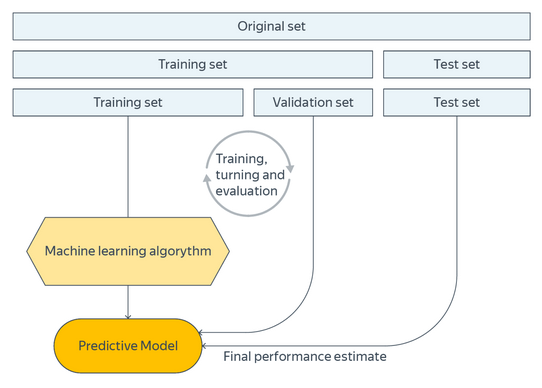

#### 2) Провести внутренюю кросс-валидацию, при этом разбить выборку на train, test - ТАК НУЖНО ДЕЛАТЬ ВСЕГДА! ОБЪЕКТИВНЕЕ РЕЗУЛЬТАТ ПОЛУЧАЕТСЯ И НА KAGGLE СКОР НЕ УЛЕТАЕТ ВНИЗ!
    Кросс-валидация на train, test нужен для оценки лучших моделей с выбранными гиперпараметрами
    В этом случае датасет разбивается на train, test. Для заданных гиперпараметров train разбивается на k фолдов, где каждый фолд будет представлен в качестве valid один раз, а на остальных фолдах в это время будет обучение модели - и так ровно k раз. В качестве оценки качества модели с выбранными гиперпараметрами берется среднее значение  метрики по валидационным фолдам;
    Финальное сравнение моделей с уже подобранными гиперпараметрами проводится на отложенном test выборке. Причём эти модели обучаются с уже подобранными гиперпараметрами на всём train-е; 

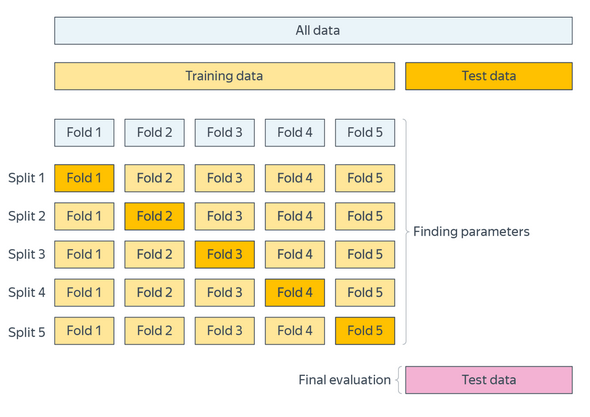



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Подгрузка датасета
X, y = load_iris(return_X_y=True)

# Подготовка train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подгрузка модели
clf = RandomForestClassifier()

In [50]:
parametrs1 = {'max_depth': range (1, 10, 2),
             'min_samples_split': range (2, 10, 2)}

grid1 = GridSearchCV(clf,  # Задаём алгоритм
                     parametrs1,  # Задаём сетку параметров
                     scoring='f1_macro',  # Задаём метрику для оценки
                     cv=5)  # Кол-во блоков в кросс-валидации

grid1.fit(X_train, y_train)  # Запуск поиска по сетке

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)},
             scoring='f1_macro')

In [51]:
# МЕГАВАЖНО: Просмотр лучших параметров
grid1.best_params_

{'max_depth': 9, 'min_samples_split': 8}

In [52]:
# МЕГАВАЖНО: Просмотр лучшего результата метрики. Возвращает среднее зн-е кросс валидации для лучшей модели
grid1.best_score_ 

0.9577715530656707

In [53]:
# МЕГАВАЖНО: Просмотр статистических данных по метрике, std для каждой комбинации гиперпараметров

def grid_cv_statistics():
    """Функция, выводящая для каждой комбинации гиперпараметров статистические данные по кросс-валидации.
       Преимущество в том, что можно провести статистическое исследование (pd.DataFrame) по комбинациям гиперпараметров"""
    means = grid1.cv_results_['mean_test_score']  # Среднее зн-е метрики валидации по всем фолдам для заданной комбинации гиперпараметров
    stds = grid1.cv_results_['std_test_score']  # Std метрики валидации по всем фолдам для заданной комбинации гиперпараметров
    params = grid1.cv_results_['params']  # Комбинация гиперпараметров

    print(f'Best рез-т: {grid1.best_score_}; Гипер-ры best рез-та: {grid1.best_params_} \n')
    for  mean, stdev, param in zip(means, stds, params):
        print(f'Метрика: {mean}; Std по фолдам: {stdev}; Гипер-ры: {param}')


grid_cv_statistics()

Best рез-т: 0.9577715530656707; Гипер-ры best рез-та: {'max_depth': 9, 'min_samples_split': 8} 

Метрика: 0.916206037970744; Std по фолдам: 0.06999652894018653; Гипер-ры: {'max_depth': 1, 'min_samples_split': 2}
Метрика: 0.9075690609127142; Std по фолдам: 0.06124092176953172; Гипер-ры: {'max_depth': 1, 'min_samples_split': 4}
Метрика: 0.8932357185298363; Std по фолдам: 0.08557074161900713; Гипер-ры: {'max_depth': 1, 'min_samples_split': 6}
Метрика: 0.8601675001984599; Std по фолдам: 0.15826802068890894; Гипер-ры: {'max_depth': 1, 'min_samples_split': 8}
Метрика: 0.9411669445105977; Std по фолдам: 0.07752664805582556; Гипер-ры: {'max_depth': 3, 'min_samples_split': 2}
Метрика: 0.9407685629357456; Std по фолдам: 0.057426889254405165; Гипер-ры: {'max_depth': 3, 'min_samples_split': 4}
Метрика: 0.949134576007641; Std по фолдам: 0.06220103306711529; Гипер-ры: {'max_depth': 3, 'min_samples_split': 6}
Метрика: 0.949134576007641; Std по фолдам: 0.06220103306711529; Гипер-ры: {'max_depth': 3, '

In [54]:
# МЕГАВАЖНО: Выбираем лучшую модель! Далее эту модель можно использовать в production-е !!!
best_clf1 = grid1.best_estimator_
best_clf1.fit(X_train, y_train)  # Заново обучаем. ЭТО НАДО ДЕЛАТЬ ВСЕГДА!
best_clf1

RandomForestClassifier(max_depth=9, min_samples_split=8)

### Подбор гиперпараметров: Умный GridSearch: с несколькими сетками параметров

Идея: в алгоритмах такое случается, что некоторые комбинации гиперпараметров заведомо дадут очень плохой скор, (на примере SVM), поэтому, чтобы отсеять эти комбинации, применяют "умный" GridSearch - даёт выигрыш во времени.

In [55]:
from sklearn.svm import SVC

# Подгрузка датасета
X, y = load_iris(return_X_y=True)

# Подготовка train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подгрузка модели
svm = SVC()

In [56]:
parametrs2_range = [0.0001, 0.001, 0.1, 1, 10, 50, 100, 1000]

parametrs2 = [{'kernel': ['linear'],
               'C': parametrs2_range},

              {'kernel': ['rbf'],
               'C': parametrs2_range,
               'gamma': parametrs2_range}]


grid2 = GridSearchCV(svm,  # Задаём алгоритм
                    parametrs2,  # Задаём сетку параметров
                    scoring='f1_macro',  # Задаём метрику для оценки
                    cv=5)  # Кол-во блоков в кросс-валидации


grid2.fit(X_train, y_train)  # Запуск поиска по сетке

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.1, 1, 10, 50, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.1, 1, 10, 50, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.1, 1, 10, 50, 100, 1000],
                          'kernel': ['rbf']}],
             scoring='f1_macro')

In [57]:
# МЕГАВАЖНО: Просмотр лучших параметров
grid2.best_params_

{'C': 1, 'kernel': 'linear'}

In [58]:
# МЕГАВАЖНО: Просмотр лучшего результата метрики. Возвращает среднее зн-е кросс валидации для лучшей модели
grid2.best_score_ 

0.9573570426821201

In [59]:
# МЕГАВАЖНО: Выбираем лучшую модель! Далее эту модель можно использовать в production-е !!! Но её надо заново обучить
best_clf2 = grid2.best_estimator_
best_clf2.fit(X_train, y_train)  # Заново обучаем
best_clf2

SVC(C=1, kernel='linear')

### Подбор гиперпараметров: GridSearch + Pipeline в sklearn

Pipeline в GridSearch имеет смысл закидывать, когда необходимо провести оптимизацию гиперпараметров разных этапов пайплайна, например, у PCA: n_components, у LogisticRegression: С

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Подгрузка датасета
X, y = load_digits(return_X_y=True)

# Подготовка train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подготовка пайплайна
pipe3 = Pipeline([("scaler", StandardScaler()), ("pca", PCA()), ("logistic", LogisticRegression(max_iter=10000, tol=0.1))])

In [61]:
parametrs3 = {
    "pca__n_components": [5, 15, 30, 45, 60],  # ОБЯЗАТЕЛЬНО задавать через два нижних подчёркивания
    "logistic__C": np.logspace(-4, 4, 4),
             }

grid3 = GridSearchCV(pipe3,  # Задаём пайплайн
                     parametrs3,  # Задаём сетку параметров
                     scoring='f1_macro',  # Задаём метрику для оценки
                     cv=5)  # Кол-во блоков в кросс-валидации

grid3.fit(X_train, y_train)  # Запуск поиска по сетке

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           tol=0.1))]),
             param_grid={'logistic__C': array([1.00000000e-04, 4.64158883e-02, 2.15443469e+01, 1.00000000e+04]),
                         'pca__n_components': [5, 15, 30, 45, 60]},
             scoring='f1_macro')

In [62]:
# МЕГАВАЖНО: Просмотр лучших параметров
grid3.best_params_

{'logistic__C': 21.54434690031882, 'pca__n_components': 60}

In [63]:
# МЕГАВАЖНО: Просмотр лучшего результата метрики. Возвращает среднее зн-е кросс валидации для лучшей модели
grid3.best_score_ 

0.9566432745368229

In [64]:
# МЕГАВАЖНО: Выбираем лучшую модель! Далее эту модель можно использовать в production-е !!!
best_clf3 = grid3.best_estimator_
best_clf3.fit(X_train, y_train)  # Заново обучаем
best_clf3

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic',
                 LogisticRegression(C=21.54434690031882, max_iter=10000,
                                    tol=0.1))])

### Подбор гиперпараметров: RandomSearch в sklearn

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Подгрузка датасета 
X, y = load_iris(return_X_y=True)

# Подготовка train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подгрузка модели
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)

In [66]:
parametrs4 = {'C': [5, 10, 15, 50, 100, 200, 300, 400, 500],
              'penalty': ['l2', 'l1', 'elasticnet']}

grid4 = RandomizedSearchCV(logistic,  # Задаём алгоритм 
                           parametrs4,  # Задаём сетку параметров 
                           scoring='f1_macro',  # Задаём метрику для оценки
                           cv=5)  # Кол-во блоков в кросс-валидации

grid4.fit(X, y)  # Запускаем поиска по сетке

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=200, random_state=0,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': [5, 10, 15, 50, 100, 200, 300, 400,
                                              500],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   scoring='f1_macro')

In [67]:
# МЕГАВАЖНО: Просмотр лучших параметров
grid4.best_params_

{'penalty': 'l1', 'C': 500}

In [68]:
# МЕГАВАЖНО: Просмотр лучшего результата метрики. Возвращает среднее зн-е кросс валидации для лучшей модели
grid4.best_score_

0.9798486114275586

In [69]:
# МЕГАВАЖНО: Выбираем лучшую модель! Далее эту модель можно использовать в production-е !!!
best_clf4 = grid4.best_estimator_
best_clf4.fit(X_train, y_train)  # Заново обучаем
best_clf4

LogisticRegression(C=500, max_iter=200, penalty='l1', random_state=0,
                   solver='saga', tol=0.01)

### Перекрёстная проверка (Кросс-валидация)

Перекрёстная проверка (кросс-валидация) - не возвращает модель, она нужна для проверки применения выбранной модели для решения ML задачи.    
 ОЧЕНЬ ВАЖНО: При перекрёстной проверке НЕОБХОДИМО всегда делать разбиение train_test_split (блоки получаем на train-е).

Особенности перекрёстной проверки:
- При перекрёстной проверке мы разбиваем на train, test (блоки получаем на train-e, test в cross_val_score не пускаем !!!!!!);
- Перекрёстная проверка работает дольше, чем стандартный train_test_split, но она объективнее;     
- Перекрёстную проверку можно впаять в GridSearch, в Sklearn она там стоит по дефолту;      
- Есть много разных вариаций перекрёстной проверки (ShuffleKFold, StratifiedKFold, GroupKFold, ...);
- В некоторых случаях если не настроить shuffle, то результат ПП может быть сильно искажён по причине неполноты обучения;  
- С увеличением числа фолдов растёт время обработки программы;  

Что можно узнать по итогу кросс-валидации:
1) Насколько хороша выбранная модель (включая гиперпараметры модели) для решения задачи - cмотрим по показателю выбранной метрики; 

2) Мера зависимости модели от наших данных, Пример:   
Метрика f1-score и cross_val_score для модели выдаёт [0.81, 0.82, 0.83, 0.84],
    - Разброс (std) = f1-score_max - f1-score_min = 0.84 - 0.81 = 0.03 < 0.05 - ПРИЕМЛЕМО (модель объективна для всех блоков) - можно пускать в production
    - Если Разброс (std) был бы равен 0.20 - НЕПРИЕМЛЕМО (модель не объективна для всех блоков) - нельзя пускать в production (проблема либо на тренировочных блоках либо на валидационных блоках)

#### Алгоритм кросс-валидации - инфа от Yandex ML:  

    — зафиксировать некоторое тестовое множество и отложить его;  
    — разделить оставшееся множество тренировочных данных на фолды, пройтись по ним циклом, на каждой итерации фиксируя один фолд в качестве валидационного и обучаясь на остальных;  
    — в качестве оценки качества модели взять среднее значение валидационной метрики по фолдам;  
    — финальное сравнение моделей с уже подобранными гиперпараметрами проводить на отложенном тестовом множестве.  

In [70]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Подгрузка датасета
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подгрузка модели
svm = SVC(C=10, random_state=42)

In [71]:
# ПРИМЕР 1 - блоки указываем прямо в cross_val_score
scores1 = cross_val_score(svm,
                         X_train, y_train,
                         cv=5,
                         scoring='f1_macro')
scores1

array([1.        , 0.95816993, 0.82222222, 1.        , 0.95816993])

In [72]:
# ПРИМЕР 2: KFold - без shuffle
kf = KFold(n_splits=5)
scores2 = cross_val_score(svm,
                         X_train, y_train,
                         cv=kf,
                         scoring='f1_macro')
scores2

array([1.        , 0.95475113, 0.90277778, 0.96190476, 0.96328502])

In [73]:
# ПРИМЕР 3: KFold - c shuffle-ом
kf = KFold(n_splits=5, shuffle=True, random_state=50)
scores3 = cross_val_score(svm,
                         X_train, y_train,
                         cv=kf,
                         scoring='f1_macro')
scores3

array([0.96328502, 0.88070175, 0.95475113, 1.        , 1.        ])

In [74]:
# ПРИМЕР 4: StratifiedKFold
scf = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
scores4 = cross_val_score(svm,
                         X_train, y_train,
                         cv=scf,
                         scoring='f1_macro')
scores4

array([0.91534392, 1.        , 1.        , 1.        , 1.        ,
       0.91534392, 1.        , 1.        , 0.91534392, 1.        ])

In [75]:
# ПРИМЕР 5: GroupKFold - ИМБА, часто применяется. В GroupKFold фигурирует еще один параметр - groups, группы мы назначаем сами (вручную). Идея: заданная группа будет либо полностью в train-блоке, либо полностью в test-блоке. 
# Группы для образцов мы должны размечать сами

from sklearn.model_selection import GroupKFold

X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y_train = np.array([1, 2, 3, 4, 5, 6])
# Сделаем вид что X_test, y_test у нас имеется :)

groups = np.array([0, 0, 2, 2, 3, 3])

group_kfold = GroupKFold(n_splits=3)  # объект group_kfold во время кросс-валидации перемешивает объекты таким образом, чтобы фиксированная группа была либо в train, либо в test 

# Покажем как работает "изнутри" GroupKFold
for i, (train_index, test_index) in enumerate(group_kfold.split(X_train, y_train, groups)):  # Метод сплит генерирует индексы для разделения данных на обучающий и тестовый(валидационный) наборы
    print(f"Split {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")


Split 0:
  Train: index=[0 1 2 3], group=[0 0 2 2]
  Test:  index=[4 5], group=[3 3]
Split 1:
  Train: index=[0 1 4 5], group=[0 0 3 3]
  Test:  index=[2 3], group=[2 2]
Split 2:
  Train: index=[2 3 4 5], group=[2 2 3 3]
  Test:  index=[0 1], group=[0 0]


In [76]:
# Запуск работы GroupKFold ничем не отличается от запуска других кросс-валидаций, за исключением того что на вход подаются группы

scores5 = cross_val_score(svm,
                         X_train,
                         y_train,
                         cv=group_kfold,
                         groups=groups,
                         scoring='f1_macro')

scores5

array([0., 0., 0.])

In [77]:
# ПРИМЕР 6: LeaveOneOut (Перекрёстная проверка с исключением по одному) - применяется для маленьких датасетов

from sklearn.model_selection import LeaveOneOut

# Подгрузка датасета 
X, y = load_iris(return_X_y=True)

# Подготовка train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Подгрузка модели
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)


loo = LeaveOneOut()  # Аргументов не принимает

print(f'Кол-во сплитов: {loo.get_n_splits(X_train, y_train)}')  # Посмотрим кол-во сплитов = кол-ву объектов


scores6 = cross_val_score(logistic,
                         X_train,
                         y_train,
                         cv=loo,
                         scoring='f1_macro')

print(f'Длина тренировочной выборки датасета: {len(X_train)} \n')
print(f'Результат кросс-валидации: {scores6}')

Кол-во сплитов: 120
Длина тренировочной выборки датасета: 120 

Результат кросс-валидации: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


##### "Чистая" реализация кросс-валидации (-можно вставлять в Optuna, использовать GroupKFold и тд)

In [20]:
# Example data
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=4)

# Split ---> train_idx, test_idx. Обращаться к самим блокам можно по этим индексам
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    print(f'Split: {i}')
    print("TRAIN idxs:", train_idx, "TEST idxs:", test_idx)
    print(f'X train for all folds:\n {X_train}')
    print(f'y_train for all folds:\n {y_train}\n')

Split: 0
TRAIN idxs: [1 2 3] TEST idxs: [0]
X train for all folds:
 [[3 4]
 [1 2]
 [3 4]]
y_train for all folds:
 [2 3 4]

Split: 1
TRAIN idxs: [0 2 3] TEST idxs: [1]
X train for all folds:
 [[1 2]
 [1 2]
 [3 4]]
y_train for all folds:
 [1 3 4]

Split: 2
TRAIN idxs: [0 1 3] TEST idxs: [2]
X train for all folds:
 [[1 2]
 [3 4]
 [3 4]]
y_train for all folds:
 [1 2 4]

Split: 3
TRAIN idxs: [0 1 2] TEST idxs: [3]
X train for all folds:
 [[1 2]
 [3 4]
 [1 2]]
y_train for all folds:
 [1 2 3]



### Работа с текстовыми данными в sklearn (+nltk, spellcheck) - крутой симбиоз для классического ML подхода в обработке текста

Документ - один экземпляр текстовых данных; Корпус - все экземпляры текстовых данных в датасете;  
Модель машинного обучения не умеет работать с текстом. Необходимо текст превратить в числа (например, в вектор, в матрицу). Существует много разных подходов для преобразования текста в числа, как правило, для разных алгоритмов (Классический ML, RNN: LSTM, GRU). 

Основные этапы обработки текста (наиболее удобный вариант последовательности) - РАЗБИВАЕМ НА ДВЕ ФУНКЦИИ. Функции вызываются методом apply (на вход принимают str):

1) 1-я функция symbols_remove: очистка текстовых данных при помощи регулярных выражений;
- Перевод в нижний регистр;  
- Очистка от мусора при помощи регулярных выражений;   

2) 2-я функция text_preprocessing:
- Токенизация (чтобы удобно реализовать обработку слов);  
- Удаление СТОП слов;  
- Исправление орфографии;  
- Приведение к базовой форме слова (стемминг или лемматизация);  
- Возвращение текста к состоянию без токенов (['The', 'sun', 'is', 'shining'] ---> ['The sun is shining']). Это делается, так как векторизатор на вход должен получить текст не в векторизованном виде.; 

3) Векторизация текста (tfidf). Токенизация текста делается автоматически во время векторизации (встроена в коробку);    

ГИПЕРВАЖНО: При работе с классическим ML, используется связка sklearn + nltk + spellcheck;   

НАИВАЖНЕЙШАЯ РЕМАРКА 1: Токенизация в контексте preprocessing-a необходима, чтобы удобно реализовать предобработку текстовых данных. Так как ф-я text_preprocessing ['The', 'sun', 'is', 'shining'] - обрабатывает; а ['The sun is shining'] - нет';  
НАИВАЖНЕЙШАЯ РЕМАРКА 2: Токенизация в контексте векторизации необходима, чтобы векторизатор получил вокабуляр. В векторизаторе по дефолту стоит реализация токенизатора!!!;  


####  Очистка текстовых данных

Прежде чем из текста делать набор векторов, необходимо полностью очистить текстовые данные от мусора. Для очистки текстовых данных хорошо подходят регулярные выражения. 
Что надо в тексте очистить (оставляем только слова в нижнем регистре!): 
- Ссылки;  
- HTML теги;    
- Пробелы;   
- Знаки и спецсимволы; (.,/&^@);  
- Цифры;    
- nan;  
- /n, /t;   
- Cмайлы;

In [78]:
# Пример регулярного выражения для очистки текстовых данных

import re

def symbols_remove(text: str) -> str:
    """
        Удаление всех символов, кроме слов.
        Функция запускается c apply для всего корпуса
       """
    link_process = re.sub(r"http://\S+|https://\S+", "", text)  # Удаление ссылок
    garbage_process = re.sub(r'([^\s\w])', '', link_process)  # Удаление мусора (оставляем слова и цифры)
    word_process = re.sub(r'\w*\d+\w*', ' ', garbage_process)  # Оставляем только слова
    output_text = re.sub('\s+', ' ', word_process).strip().lower()  # Удаление пробелов, перевод регистра
    return re.sub(r'\n', '', output_text)


symbols_remove('Привет, как дела? Сегодня я ходил за покупками в Сбермакет 131412')

'привет как дела сегодня я ходил за покупками в сбермакет'

#### Токенизация

Токенизация - процесс разбиения текста на набор отдельных токенов (слов или набора слов). Осуществить токенизацию можно при помощи nltk (также можно вручную написать функцию, которая делает split для текста).

In [79]:
from nltk.tokenize import word_tokenize

# Пример работы токенизатора от nltk
word_tokenize('Messi is the most cool footballist in the world')

['Messi', 'is', 'the', 'most', 'cool', 'footballist', 'in', 'the', 'world']

#### Удаление СТОП-СЛОВ

Стоп - слова это слова, которые чрезвычайно распространены во всех текстах и скорее всего не принесут пользы в виде важной информации, которую можно использовать для различения классов(например, новости);  
Примеры стоп-слов: is, and, or, not. Стоп-слова рекомендуется удалить (как пр-ло, даёт небольшой прирост метрики); 

In [80]:
# Стоп-слова в nltk
from nltk.corpus import stopwords


STOP_WORDS_ENGLISH = stopwords.words('english')
print('Stop words in english language:')
print(STOP_WORDS_ENGLISH)
print(len(STOP_WORDS_ENGLISH))

print('Stop words in Russian language:')
STOP_WORDS_RUSSIAN = stopwords.words('russian')
print(STOP_WORDS_RUSSIAN)
print(len(STOP_WORDS_RUSSIAN))

Stop words in english language:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only'

In [81]:
datas = 'Hi! How are you?  I am fine, thank you very much!'

STOP_WORDS_ENGLISH = stopwords.words('english')
remove_stop_words = [elem for elem in datas.split() if elem not in STOP_WORDS_ENGLISH]
remove_stop_words

['Hi!', 'How', 'you?', 'I', 'fine,', 'thank', 'much!']

#### Исправление орфографии (spellcheck)

При помощи spellcheck можно реализовать устранение орфографических ошибок в тексте. И, соответственно, данные будут более качественные.  
Как правило, использование spellcheck даёт прирост в метрике (особенно если текст.данные взяты из соц.сетей)  

In [82]:
from spellchecker import SpellChecker

# Пример 1: через ф-ю

def spell_check(text: str):
    """Функция для устранения орфографических ошибок в тексте.
       Запускается от apply"""
    result = []
    spell = SpellChecker()
    for word in text.split():
        correct_word = spell.correction(word)
        result.append(correct_word)
    return result

#Test
text = "He how are you? i am finee"

spell_check(text)

['He', 'how', 'are', 'you', 'i', 'am', 'fine']

In [83]:
# Пример 2: через list comprehensive
text = 'He how are you? i am finee'

[SpellChecker().correction(word) for word in text.split()]

['He', 'how', 'are', 'you', 'i', 'am', 'fine']

####  Приведение к базовой форме слова (стеммиг, лемматизация)

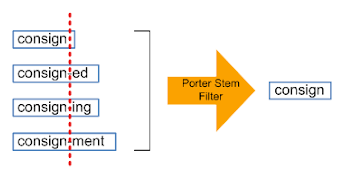

Стеммизация — процесс приведения слова к его корню/основе (слово может не существовать).  
Он приводит различные вариации слова (например, "help", "helping", "helped", "helpful") к его начальной форме (например, "help"), удаляет все придатки слов (приставка, суффикс, окончание) и оставляет только основу слова.  

ГИПЕРВАЖНО: Корень слова может быть существующим в языке словом, а может и не быть им. Например, "mov" корень слова "movie", "emot" корень слова "emotion".  

Лемматизация - процесс приведения слова к его корню/основе (слово должно существовать).  
Лемматизация похожа на стеммизацию в том, что она приводит слово к его начальной форме, но с одним отличием: в данном случае корень слова будет существующим в языке словом. Например, слово "caring" прекратится в "care", а не "car", как в стеммизации.  

WordNet — это база существующих в английском языке слов. Лемматизатор из NLTK WordNetLemmatizer() использует слова из WordNet.

ГИПЕРВАЖНО: Как правило, лемматизация работает лучше, чем стеммизация (потому что стеммизация может внести шума)


In [84]:
from nltk.stem import SnowballStemmer # Стемминг


# Пример стеммера из nltk (Этот стеммер наиболее новый)
stemmer = SnowballStemmer('english')
stemmer.stem('Building')

'build'

In [85]:
from nltk.stem import WordNetLemmatizer  # Лемматизация (надо скачать)

# Пример лемматизатора из nltk
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('builders')

'builder'

In [86]:
words = 'Today was very gorgeous day! I will be in mall and buy a lot of purchases'
review = [stemmer.stem(word) for word in words.split()]
print(review)

['today', 'was', 'veri', 'gorgeous', 'day!', 'i', 'will', 'be', 'in', 'mall', 'and', 'buy', 'a', 'lot', 'of', 'purchas']


#### Векторизация

Процесс конвертации текста в числа называется векторизацией. Теперь после Text Preprocessing, нам нужно представить текст в числовом виде, то есть закодировать текстовые данные в виде чисел, которые в дальнейшем могут использоваться в алгоритмах.

ВАЖНО: Представленные ниже примеры учитывают слова без контекста (в контексте может содержаться важная информация) - поэтому это классический, но плохой подход. Для учёта контекста необходимо применять более мощные методы с DL (BERT, например);  
ВАЖНО: На выходе из этапа векторизации (transform) мы получаем огромный sparse_matrix. Для его оценки можно посмотреть shape;   
ВАЖНО: При работе с векторизацией текста, после того, как сделали fit_transform (или fit + transform) для train, а также transform для test, эти получившиеся данные после преобразования можно сразу подавать на ML алгоритм. Представлять огромный sparse_matrix в df - ПЛОХО;   
ВАЖНО: У представленных ниже примеров (мешок слов, tfidf) есть ВАЖНЫЙ гипер-р ngram_range - его нужно подбирать оптимизацией гиперпараметров;  

ГИПЕРГИПЕРВАЖНО: На этапе векторизации у нас векторизатор принимает текст в виде str (для каждого документа)!!!!!!  Пример: ['you are my sunshine'];  
ГИПЕРГИПЕРВАЖНО: Векторизаторы автоматически (из под капота) для получения вокабуляров реализуют токенизацию!  
ГИПЕРГИПЕРВАЖНО: Кол-во векторных признаков (как для мешка слов, так и для tfidf) равно кол-ву уникальных токенов (вокабуляров), выделенных во время обучения модели;   

ПАМЯТКА: При запуске метода fit для X_train векторизатор автоматически создаёт токены и запоминает их в вокабуляре;  
ПАМЯТКА: При запуске метода transform векторизатор из под коробки токенизирует все слова и далее выдаёт векторное представление;  
ПАМЯТКА: Векторизаторы умеют работать только с теми словами, которые были в X_train;  

Этапы векторизации (как для bag of words, tfidf, n-gramms): 
1) Токенизация;  
2) Создание вокабуляра;  
3) Векторизация;   

In [87]:
# CountVectorizer(tokenizer=) - доказательство того, что в векторизаторе есть автоматический токенизатор

In [88]:
import numpy as np

train_docs = np.array(['The sun is shining', 
                 'The weather is sweet', 
                 'The sun is shining and the weather is sweet, and one and one is two'])

##### В-я 1) Мешок слов  

In [89]:
from sklearn.feature_extraction.text import CountVectorizer 

count_vectorizer1 = CountVectorizer()  # Реализует концепцию мешка слов
vectors1 = count_vectorizer1.fit_transform(train_docs)  # Сначала запускается метод fit, а далее запускается метод transform, который return-ит вектор для каждого текста; При вызове fit получается вокабуляр слов
vectors1

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [90]:
# Посмотрим вокабуляр слов (на этих словах обучались). Индекс означает порядок слова в df 
count_vectorizer1.vocabulary_

{'the': 6,
 'sun': 4,
 'is': 1,
 'shining': 3,
 'weather': 8,
 'sweet': 5,
 'and': 0,
 'one': 2,
 'two': 7}

In [91]:
print(vectors1.toarray())
print(type(vectors1))  # На выходе получаем sparse_matrix

[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [3 3 2 1 1 1 2 1 1]]
<class 'scipy.sparse._csr.csr_matrix'>


In [92]:
# Пример predict-а
predict1 = count_vectorizer1.transform(['Sun is sweet'])
print(type(predict1))  # Также sparse_matrix
print(predict1.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0 1 0 0 1 1 0 0 0]]


##### В-я 2) N-граммы (лучше всего биграммы, триграммы)

Текст : "The sun is shining"
Однограммное представление: "The", "sun", "is", "shining";  
Биграммное представление:  "The sun", "sun is", "is shining";

ГИПЕРВАЖНО: При помощи того же класса CountVectorizer, который реализует векторизацию в виде мешка слов, можно получить N-граммы;  
ГИПЕРВАЖНО (на примере биграмм): Биграммы можно получить таким образом, чтобы были только сдвоенные слова. Но, можно получить так, чтобы слова были как в одиночном порядке (в вокабуляре), так и в в сдвоенном (см. пример ниже);   

In [93]:
# Создадим N-грамму только со сдвоенными словами
count_vectorizer2 = CountVectorizer(ngram_range=(2, 2))  # Реализует концепцию N-граммы
vectors2 = count_vectorizer2.fit_transform(train_docs)  # Сначала запускается метод fit, а далее запускается метод transform, который return-ит вектор для каждого текста; При вызове fit получается вокабуляр слов
vectors2

<3x13 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [94]:
# Посмотрим вокабуляр слов: только сдвоенные слова
count_vectorizer2.vocabulary_

{'the sun': 10,
 'sun is': 8,
 'is shining': 2,
 'the weather': 11,
 'weather is': 12,
 'is sweet': 3,
 'shining and': 7,
 'and the': 1,
 'sweet and': 9,
 'and one': 0,
 'one and': 5,
 'one is': 6,
 'is two': 4}

In [95]:
print(vectors2.toarray())
print(type(vectors2))  # На выходе получаем sparse_matrix

[[0 0 1 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 1]
 [2 1 1 1 1 1 1 1 1 1 1 1 1]]
<class 'scipy.sparse._csr.csr_matrix'>


In [96]:
# Пример predict-а
predict2 = count_vectorizer2.transform(['Sun is sweet'])
print(type(predict2))  # Также sparse_matrix
print(predict2.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 1 0 0 0 0 1 0 0 0 0]]


In [97]:
# Создадим N грамму как с одиночными, так и со сдвоенными словами
count_vectorizer3 = CountVectorizer(ngram_range=(1, 2))
vectors3 = count_vectorizer3.fit_transform(train_docs)
vectors3

<3x22 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [98]:
# Посмотрим вокабуляр слов: одиночные и сдвоенные слова
count_vectorizer3.vocabulary_

{'the': 16,
 'sun': 12,
 'is': 3,
 'shining': 10,
 'the sun': 17,
 'sun is': 13,
 'is shining': 4,
 'weather': 20,
 'sweet': 14,
 'the weather': 18,
 'weather is': 21,
 'is sweet': 5,
 'and': 0,
 'one': 7,
 'two': 19,
 'shining and': 11,
 'and the': 2,
 'sweet and': 15,
 'and one': 1,
 'one and': 8,
 'one is': 9,
 'is two': 6}

In [99]:
print(vectors3.toarray())
print(type(vectors3))  # На выходе получаем sparse_matrix

[[0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1]
 [3 2 1 3 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1]]
<class 'scipy.sparse._csr.csr_matrix'>


In [100]:
# Пример predict-а
predict3 = count_vectorizer3.transform(['Sun is sweet'])
print(type(predict3))  # Также sparse_matrix
print(predict3.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]]


##### В-я 3) tf-idf

 tf-idf

tf-idf (сокращение от term frequency — inverse document frequency) – это статистическая мера для оценки важности слова в документе, который является частью или корпуса.  
Основная идея tf-idf: Если слово в документе встречается часто, а в остальных документах встречается реже, то оценка этого слова будет высокая. В этом смысле слово наиболее полно (скорее всего) характеризует именно данный документ.   

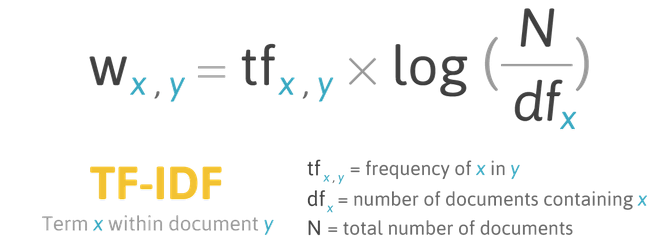

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer1 = TfidfVectorizer()  # Создаёт концепцию tfidf векторизатора
tfidf_vectors1 = tfidf_vectorizer1.fit_transform(train_docs)
tfidf_vectors1

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [102]:
# Посмотрим вокабуляр слов
tfidf_vectorizer1.vocabulary_

{'the': 6,
 'sun': 4,
 'is': 1,
 'shining': 3,
 'weather': 8,
 'sweet': 5,
 'and': 0,
 'one': 2,
 'two': 7}

In [103]:
print(type(tfidf_vectors1))  # На выходе получаем sparse_matrix
print(tfidf_vectors1.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.43370786 0.         0.55847784 0.55847784 0.
  0.43370786 0.         0.        ]
 [0.         0.43370786 0.         0.         0.         0.55847784
  0.43370786 0.         0.55847784]
 [0.65703026 0.38805265 0.43802017 0.16656282 0.16656282 0.16656282
  0.25870177 0.21901009 0.16656282]]


In [104]:
# Пример predict-а
predict4 = tfidf_vectorizer1.transform(['Sun is sweet'])
print(type(predict4))  # Также sparse_matrix
print(predict4.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.48133417 0.         0.         0.61980538 0.61980538
  0.         0.         0.        ]]


In [105]:
# Также, как и для модели мешка слов, у tfidf есть параметр ngram_range
tfidf_vectorizer2 = TfidfVectorizer(ngram_range=(2, 2))
tfidf_vectors2 = tfidf_vectorizer2.fit_transform(train_docs)
tfidf_vectors2

<3x13 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [106]:
# Посмотрим вокабуляр слов для tfidf
tfidf_vectorizer2.vocabulary_

{'the sun': 10,
 'sun is': 8,
 'is shining': 2,
 'the weather': 11,
 'weather is': 12,
 'is sweet': 3,
 'shining and': 7,
 'and the': 1,
 'sweet and': 9,
 'and one': 0,
 'one and': 5,
 'one is': 6,
 'is two': 4}

In [107]:
print(type(tfidf_vectors2))  # На выходе получаем sparse_matrix
print(tfidf_vectors2.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.57735027 0.         0.         0.
  0.         0.         0.57735027 0.         0.57735027 0.
  0.        ]
 [0.         0.         0.         0.57735027 0.         0.
  0.         0.         0.         0.         0.         0.57735027
  0.57735027]
 [0.54492885 0.27246443 0.20721622 0.20721622 0.27246443 0.27246443
  0.27246443 0.27246443 0.20721622 0.27246443 0.20721622 0.20721622
  0.20721622]]


In [108]:
# Пример predict-а
predict5 = tfidf_vectorizer2.transform(['Sun is sweet'])
print(type(predict5))  # Также sparse_matrix
print(predict5.toarray())

<class 'scipy.sparse._csr.csr_matrix'>
[[0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.70710678 0.         0.         0.
  0.        ]]


### Оформление мини-проекта работы с текстом (Pipeline + GridSearch + CrossValidation).

Две функции с трансформациями я не запихивал в Pipeline, так как это не имеет смысла. Лучше 1 раз сделать это до запуска GridSearch + CrossValidation, иначе на каждом валидационном блоке эти две функции будут заново запускаться - лишние вычислительные затраты.  
После того, как выполнены все этапы, то в прод внутрь пайплайна можно впихнуть функции с трансформациями - правильный подход с вычислительной точки зрения.  

In [109]:
df = pd.DataFrame([['Hey, how are you? i am fine. I love you my mom', 1],
                  ['I will definitely watch this movie! Thank you very mach', 1],
                  ['I am okey. Thank you very much for your kindness', 1],
                  ['This movie is bullshit! I dont like these scenes', 0],
                  ['Very awfull cinema! I spent my money :(', 0],
                  ['With best regarding, your friend Ali', 1],
                  ['I found a lot of useful data for our project', 1],
                  ['What exactly do you want to know? I dont understand you!', 0],
                  ['Thanks for your eat! It is wonderful!', 1],
                  ['Whats up, man? Everything is okay?', 1],
                  ['Dont worry, my friend! Everything is gonna be alright!', 1],
                  ['Terrible music!', 0],
                  ['Today was very awfully day!!!', 0],
                  ['Do you like eat something my friend?', 1],
                  ['Try to go beyond your mind', 1],
                  ['Try to do something for your family', 1],
                  ['It is your bad mistake!', 1],
                  ['I am from Russia, Moscow city', 1],
                  ['Where are you from? I am from Moscow', 1],
                  ['It was very great day', 1]],
                 columns=['text', 'label'])

df

,text,label
0,"Hey, how are you? i am fine. I love you my mom",1
1,I will definitely watch this movie! Thank you ...,1
2,I am okey. Thank you very much for your kindness,1
3,This movie is bullshit! I dont like these scenes,0
4,Very awfull cinema! I spent my money :(,0
5,"With best regarding, your friend Ali",1
6,I found a lot of useful data for our project,1
7,What exactly do you want to know? I dont under...,0
8,Thanks for your eat! It is wonderful!,1
9,"Whats up, man? Everything is okay?",1


In [110]:
def symbols_remove(input_text: str) -> str:
    """Удаление всех символов, кроме слов.
       Функция запускается c apply для всего корпуса"""
    
    link_process = re.sub(r"http://\S+|https://\S+", "", input_text)  # Удаление ссылок

    garbage_process = re.sub(r'([^\s\w])', '', link_process)  # Удаление мусора (оставляем слова и цифры)

    word_process = re.sub(r'\w*\d+\w*', ' ', garbage_process)  # Оставляем только слова

    output_text = re.sub('\s+', ' ', word_process).strip().lower()  # Удаление пробелов, перевод регистра

    return re.sub(r'\n', '', output_text)


# Test 
symbols_remove('FDFD 4324234 FSDFSDF 43423 /////') 

'fdfd fsdfsdf'

In [111]:
spell = SpellChecker()  # Для исправление орфографии 
stemmer = SnowballStemmer('english')  # Для стеммера


def text_preprocessing(input_text: str) -> str:
   """Токенизация, удаление стоп слов, исправление орфографии,
      Стемминг, перевод из списка токенов в str (для этапа векторизации)
      Функция запускается с apply для всего корпуса"""
   
   text_tokens = word_tokenize(input_text)  # Токенизация
   
   text_without_sw = [word for word in text_tokens if word not in STOP_WORDS_ENGLISH]  # Удаление стоп-слов

   text_with_spelling = [spell.correction(word) for word in text_without_sw]  # Исправление орфографии 

   text_with_stemming = [stemmer.stem(word) for word in text_with_spelling]  # Стемминг

   output_text = ' '.join(text_with_stemming)
   
   return output_text


# Test 
text_preprocessing('nicely finding gotn taked expected')

'nice find got take expect'

In [112]:
# Completely text preprocessing
df['text'] = df['text'].apply(symbols_remove)  # RegEx preprocessing
df['text'] = df['text'].apply(text_preprocessing)  # Tokenization, stop words, spelling, stemming, return to str
df.sample(5)  # Successful 

,text,label
15,tri someth famili,1
17,russia moscow citi,1
2,okey thank much kind,1
8,thank eat wonder,1
0,hey fine love mom,1


In [113]:
# Important: text separate. Because we use CrossValidation in GS, we separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], shuffle=True, random_state=42)

In [114]:
# Create pipeline
text_pipeline = Pipeline([
                          ('vectorizer', TfidfVectorizer()), 
                          ('lr', LogisticRegression())
                         ])

In [115]:
# Grid parametrs
parametrs = {
              'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
              'lr__C': [5, 10, 15, 20, 25, 50, 100, 200, 500],
              'lr__penalty': ['l1', 'l2', 'elasticnet']
            }

# CrossValidation into GridSearch
kf = KFold(n_splits=5, shuffle=True, random_state=50)

# Create grid search (+ CrossValidation in GridSearch)
grid_search = GridSearchCV(text_pipeline,
                           parametrs,
                           scoring='f1',
                           cv=kf)

# Start
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [5, 10, 15, 20, 25, 50, 100, 200, 500],
                         'lr__penalty': ['l1', 'l2', 'elasticnet'],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             scoring='f1')

In [116]:
# Let's look the best param result in GridSearch + CrossValidation
grid_search.best_score_

0.8

In [117]:
# Lets look the best hyperparametr combination
grid_search.best_params_

{'lr__C': 5, 'lr__penalty': 'l2', 'vectorizer__ngram_range': (1, 2)}

In [118]:
# Lets look the best Pipeline
best_pipeline = grid_search.best_estimator_

# Fit again for best pipeline 
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('lr', LogisticRegression(C=5))])

In [119]:
# Best model test in X_test
best_pipeline.score(X_test, y_test)

1.0

### Использование ООП в DS проекте и структурирование DS проекта (включая def в Pipeline)

Весь DS проект должен структурироваться в классах, функциях. Возьмём класс для предобработки данных.
Возьмём, например, этап data preprocessing (предобработки данных) и этап feature engineering (генерация новых фичей). 
В этапе data preprocessin-а имеются:
- Обработка пропусков;   
- Обработка выбросов;  
- Отбор признаков (удаление мусора по разным критериям);
- Генерация новых признаков;
- Масштабирование;


Соответственно, на каждый этап data preprocessing-а необходимо создать отдельный класс или функцию. Этап feature engineering заворачивается в отдельный класс (при необходимости, если есть на этапе feature engineering необходимость в init, fit, transform). 

В классе для предобработки данных необходимы следующие методы:  
1. init() - Здесь храним статистические хар-ки train выборки датасета; В init-е их прописываем как None, заполняем их данными в fit-e при подаче в fit X_train;       
2. fit()  - Здесь производится расчёт и сохранение статистических характеристик (в fit подаём только X_train !!!), которые есть в init;    
3. transform() - Здесь храним весь пайплайн предобработки данных;  
4. fit_transform() - Здесь вызываем fit и вызываем transform (этот метод нужен для работы с train выборкой); В кастомных классах можно явно не писать этот метод, а использовать наследование от TransformerMixin  

ГИПЕРВАЖНО: В fit, fit_transform всегда подаём только обучающую выборку X_train, X_test туда подавать ни в коем случае нельзя - ЭТО ОЧЕНЬ ГРУБАЯ ОШИБКА!!!  
ГИПЕРВАЖНО: Внутри класса в методах сами данные называть через X;  
ГИПЕРВАЖНО: В методах класса (кроме __init__) ВСЕГДА ДОЛЖЕН БЫТЬ return (например, return в fit, transform)  
ГИПЕРВАЖНО: В методе класса fit return-ом всегда является self. Т.е return self. Более того, в fit всегда надо в аргументах указывать y=None - иначе конвейер не запустится!!!

ГИПЕРГИПЕРВАЖНО: При использовании кастомного класса, а также Pipeline, при вызове метода fit от Pipeline-а, вычисленные статистики (которые прописаны в init-е кастомного класса) сохраняются внутри самого Pipeline-а, и их можно посмотреть. То же самое относится и к встроенным классам sklearn.

In [120]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataTransform(BaseEstimator, TransformerMixin):
    def __init__(self, median=None):
        self.median = median

    def fit(self, X: pd.DataFrame, y=None):
        self.median = int(X.median())
        return self
        
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X + self.median
        return X
    

df100 = pd.DataFrame([10, 20, 30, 40, 50])

In [121]:
# ООП - ПРИМЕР 1 
pipocka1 = Pipeline([('transform', DataTransform())])
pipocka1.fit(df100)
pipocka1.transform(df100)

,0
0,40
1,50
2,60
3,70
4,80


In [122]:
# ООП: Использование BaseEstimator - даёт возможность пользоваться методами get_params(), set_params() для этапов Pipeline. Эти методы позволяют смотреть/устанавливать аттрибуты экземпляра класса
print(pipocka1.steps[0][1].get_params()['median'])
pipocka1.steps[0][1].set_params(median=30)

30


DataTransform(median=30)

In [123]:
# Посмотрим вычисленную статистику от кастомного класса при вызове метода fit
print(f'Вычисленная статистика кастомного класса при вызове метода fit: {int(pipocka1[0].median)}')

Вычисленная статистика кастомного класса при вызове метода fit: 30


In [124]:
# ООП: Использование TransformerMixin - наследуется в этом случае метод fit_transform. Явно его в своём кастомном классе не надо указывать!
pipocka1.fit_transform(df100)

,0
0,40
1,50
2,60
3,70
4,80


In [125]:
# ООП - ПРИМЕР 2
pipocka2 = Pipeline([('transform', DataTransform()), ('norm', MinMaxScaler())])
pipocka2.fit(df100)
pipocka2.transform(df100)

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [126]:
# Проверка того, что в MinMaxScaler попали трансформированные данные
print(f'Минимум: {pipocka2[1].data_min_}')
print(f'Максимум: {pipocka2[1].data_max_}')

Минимум: [40.]
Максимум: [80.]


In [127]:
# ИСПОЛЬЗОВАНИЕ def в Pipeline 
# ВАЖНО 1: def в Pipeline следует использовать только для этапов трансформирования (где нету обучения fit, fit_transform)
# ВАЖНО 2: При использовании кастомной функции def, ф-я заворачивается в ООП FunctionTransformer класс, где имеются методы fit, fit_transform и тд, эти методы классы служат как "заглушка", чтобы конвейер смог и далее работать безотказно! 
# ВАЖНО 3: Функция должна обязательно что-то return-ить
# ВАЖНО 4: Внутри ф-ии аргумент обзываем как X, y не надо вообще указывать в аргументах (в отличие от ООП, где надо явно прописывать y=None) - но если хочется, то можно, чтобы стандартизировать код
# ВАЖНО 5: Если в кастомную функцию хотим добавить инверсивную функцию, то при обёртке необходимо явно указать эту инверсивную функцию, иначе инверсия работать не будет (ошибки тоже не будет!)


from sklearn.preprocessing import FunctionTransformer

def transf_func(X: pd.DataFrame, y=None):
    return X + 30  # Добавляю + 30 чтобы сравнить с медианой из ООП ПРИМЕРА 1


transformer1 = FunctionTransformer(transf_func)  # Оборачиваем кастомную функцию transf_func в ООП класс FunctionTransformer

In [128]:
# def - ПРИМЕР 3 - для сравнения с ООП (СОВПАЛО). fit не запускаю так как нет обучения. Если запустить fit - ничего не изменится
pipocka3 = Pipeline([('transform', transformer1)])
pipocka3.transform(df100)

,0
0,40
1,50
2,60
3,70
4,80


In [129]:
# def - ПРИМЕР 4 - для сравнения с ООП (УРА, СОВПАЛО). fit запускаю так как MinMaxScaler нуждается в обучении (вычисление статистик). 
pipocka4 = Pipeline([('transform', transformer1), ('norm', MinMaxScaler())])
pipocka4.fit(df100)
pipocka4.transform(df100)

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [130]:
# Проверка того, что в MinMaxScaler попали трансформированные данные
print(f'Минимум: {pipocka4[1].data_min_}')
print(f'Максимум: {pipocka4[1].data_max_}')

Минимум: [40.]
Максимум: [80.]


In [131]:
# def - ПРИМЕР 5 - Использование инверсии для кастомной функции (УРА, СОВПАЛО)

def inverse_func(X):
    return X - 30  # Функция инверсии

transformer2 = FunctionTransformer(transf_func, inverse_func=inverse_func)  # Оборачиваем кастомную функцию transf_func в ООП класс FunctionTransformer

pipocka5 = Pipeline([('transform', transformer2), ('norm', MinMaxScaler())])
pipocka5.fit(df100)  # Вычисление статистик для MinMaxScaler
pipocka5.inverse_transform(np.array([[0.  ],
                                     [0.25],
                                     [0.5 ],
                                     [0.75],
                                     [1.  ]]))

array([[10.],
       [20.],
       [30.],
       [40.],
       [50.]])

In [132]:
# ПРИМЕР ИСПОЛЬЗОВАНИЯ КАСТОМНОГО ООП КЛАССА ДЛЯ ЗАДАЧИ ГЕНЕРАЦИИ НОВЫХ ФИЧЕЙ (ПРЕДСКАЗЫВАНИЕ СТОИМОСТИ ДОМОВ)

class FeatureGenetator(TransformerMixin):
    """Класс для генерации новых фич"""

    def __init__(self, DistrictId_counts=None, binary_to_numbers=None, med_price_by_floor_year=None, house_year_max=None, floor_max=None, house_year_min=None, floor_min=None, district_size=None):
        """Здесь хранятся статистические характеристики"""
        self.DistrictId_counts = DistrictId_counts
        self.binary_to_numbers = binary_to_numbers
        self.med_price_by_floor_year = med_price_by_floor_year
        self.house_year_max = house_year_max
        self.floor_max = floor_max
        self.house_year_min = house_year_min
        self.floor_min = floor_min
        self.district_size = district_size
        

    def fit(self, X, y=None):
        """Обучение: получение статистических характеристик из X_train"""

        X = X.copy()
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
        
        # Target encoding

        # District, Rooms
        df = X.copy()
        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()

        # floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        return self    
        

    def transform(self, X) -> pd.DataFrame:
        """Трансформация данных"""
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    


# Запускаем так (ниже) без использования Pipeline
# features_gen = FeatureGenetator()
# features_gen.fit_transform(X_train)  
# features_gen.transform(X_test)

# В случае использования pipeline запускаем fit (для train) и predict (для test) - ЗАПУСКАЕМ ОТ Pipeline-а, естесственно

### Сохранение модели 

Осуществляется через pickle или joblib; 

In [133]:
import pickle

# Сохранение модели
MODEL_SAVE_PATH = "D:\model"

with open(MODEL_SAVE_PATH, 'wb') as file:
    pickle.dump(logistic, file)

In [134]:
with open(MODEL_SAVE_PATH, 'rb') as file:
    model = pickle.load(file)

In [135]:
# Ура, всё работает!
model

LogisticRegression(max_iter=200, random_state=0, solver='saga', tol=0.01)